# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path, convert_to_knot= './data/NCDC/europe/france/pau_pyrenees/dat.txt', True # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/portugal/36N5W/dat.csv', 0.9, 4
# file_path= 'data/ECMWF/greece/38N25E/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/greece/37N22E/dat.csv', 1.3, 4
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.7, 4 #good
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good, but the data might be problematic.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.9 # good
# file_path, bandwidth= 'data/ECMWF/iceland/65N17W/dat.csv', 1.9 # good, can try 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 0.9, 4 # good
# file_path, bandwdith = 'data/ECMWF/sudan/18N32E/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/china/24N121E/dat.csv', 0.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 0.9, 5 # miss the peak

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

time        lat         lon         x         y  \
0     1979-01-01 00:00:00  47.000004  237.000015  2.647999  0.267029   
1     1979-01-01 06:00:00  47.000004  237.000015  3.995660 -0.144256   
2     1979-01-01 12:00:00  47.000004  237.000015  3.473003 -0.148026   
3     1979-01-01 18:00:00  47.000004  237.000015  4.140249 -0.252757   
4     1979-01-02 00:00:00  47.000004  237.000015  3.594884 -0.379231   
5     1979-01-02 06:00:00  47.000004  237.000015  2.746273 -0.223362   
6     1979-01-02 12:00:00  47.000004  237.000015  2.730588 -0.236722   
7     1979-01-02 18:00:00  47.000004  237.000015  3.165043 -0.074385   
8     1979-01-03 00:00:00  47.000004  237.000015  2.419378 -0.246756   
9     1979-01-03 06:00:00  47.000004  237.000015  2.862289 -0.340428   
10    1979-01-03 12:00:00  47.000004  237.000015  3.044513 -0.086254   
11    1979-01-03 18:00:00  47.000004  237.000015  3.830171  0.351548   
12    1979-01-04 00:00:00  47.000004  237.000015  3.335711  0.394578   
13    1979-01-04 06:00:00  47.000004  237.000015  4.174526  0.585728   
14    1979-01-04 12:00:00  47.000004  237.000015  4.058359  0.528861   
15    1979-01-04 18:00:00  47.000004  237.000015  4.325488  0.224195   
16    1979-01-05 00:00:00  47.000004  237.000015  3.402502  0.000142   
17    1979-01-05 06:00:00  47.000004  237.000015  3.837243  0.146394   
18    1979-01-05 12:00:00  47.000004  237.000015  4.046267  0.215382   
19    1979-01-05 18:00:00  47.000004  237.000015  4.108260  0.444252   
20    1979-01-06 00:00:00  47.000004  237.000015  3.349026  0.390269   
21    1979-01-06 06:00:00  47.000004  237.000015  3.633429  0.062893   
22    1979-01-06 12:00:00  47.000004  237.000015  3.118314 -0.074798   
23    1979-01-06 18:00:00  47.000004  237.000015  3.809524 -0.161539   
24    1979-01-07 00:00:00  47.000004  237.000015  3.085909 -0.192037   
25    1979-01-07 06:00:00  47.000004  237.000015  3.664690 -0.083538   
26    1979-01-07 12:00:00  47.000004  237.000015  3.382452 -0.264118   
27    1979-01-07 18:00:00  47.000004  237.000015  3.944830 -0.433693   
28    1979-01-08 00:00:00  47.000004  237.000015  3.127045 -0.206463   
29    1979-01-08 06:00:00  47.000004  237.000015  3.724320 -0.719214   
...                   ...        ...         ...       ...       ...   
55614 2017-01-24 12:00:00  47.000004  237.000015  1.086352  0.086252   
55615 2017-01-24 18:00:00  47.000004  237.000015  0.560820 -1.798263   
55616 2017-01-25 00:00:00  47.000004  237.000015 -0.626857 -0.807715   
55617 2017-01-25 06:00:00  47.000004  237.000015  0.759055 -0.525668   
55618 2017-01-25 12:00:00  47.000004  237.000015  1.200475 -0.884055   
55619 2017-01-25 18:00:00  47.000004  237.000015  1.677295 -2.362282   
55620 2017-01-26 00:00:00  47.000004  237.000015 -0.320672 -0.902915   
55621 2017-01-26 06:00:00  47.000004  237.000015  0.903521 -0.664626   
55622 2017-01-26 12:00:00  47.000004  237.000015  1.143721 -0.732172   
55623 2017-01-26 18:00:00  47.000004  237.000015  0.907468 -0.859518   
55624 2017-01-27 00:00:00  47.000004  237.000015  0.155235 -1.132799   
55625 2017-01-27 06:00:00  47.000004  237.000015  1.298310 -1.043114   
55626 2017-01-27 12:00:00  47.000004  237.000015  2.244130 -0.784854   
55627 2017-01-27 18:00:00  47.000004  237.000015  2.385641 -1.353739   
55628 2017-01-28 00:00:00  47.000004  237.000015  0.973621 -1.108333   
55629 2017-01-28 06:00:00  47.000004  237.000015  1.821739 -1.481803   
55630 2017-01-28 12:00:00  47.000004  237.000015  2.432666 -1.341209   
55631 2017-01-28 18:00:00  47.000004  237.000015  1.528744 -2.952466   
55632 2017-01-29 00:00:00  47.000004  237.000015  1.168126 -1.802726   
55633 2017-01-29 06:00:00  47.000004  237.000015  1.314004 -1.955485   
55634 2017-01-29 12:00:00  47.000004  237.000015  1.522460 -2.221667   
55635 2017-01-29 18:00:00  47.000004  237.000015 -0.413008 -5.020831   
55636 2017-01-30 00:00:00  47.000004  237.000015 -0.982927 -3.730390   
55637 2017-01-30 06:00:00  47.000004  237.000015 -0.351251 -1

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


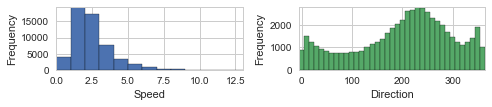

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat           lon             x             y         speed  \
count  5.552000e+04  5.552000e+04  55520.000000  55520.000000  55520.000000   
mean   4.700000e+01  2.370000e+02     -0.321844     -0.884809      2.487596   
std    3.119311e-11  1.956284e-10      1.807192      1.964791      1.350773   
min    4.700000e+01  2.370000e+02     -9.166093    -11.388456      0.010145   
25%    4.700000e+01  2.370000e+02     -1.597408     -1.977554      1.599009   
50%    4.700000e+01  2.370000e+02     -0.498411     -0.653762      2.178386   
75%    4.700000e+01  2.370000e+02      1.110799      0.476234      3.057293   
max    4.700000e+01  2.370000e+02      6.508003      4.706675     12.387152   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     202.258338  1.997567e+07    900.000000    188.846128  
std       95.811944  1.096640e+05    670.826435     86.670238  
min        0.002391  1.979010e+07      0.000000      0.002385  
25%      143.279492  1.988070e+07    450.000000    118.751850  
50%      217.561220  1.997567e+07    900.000000    199.535223  
75%      271.516374  2.007070e+07   1350.000000    251.826329  
max      359.992136  2.016123e+07   1800.000000    359.994014

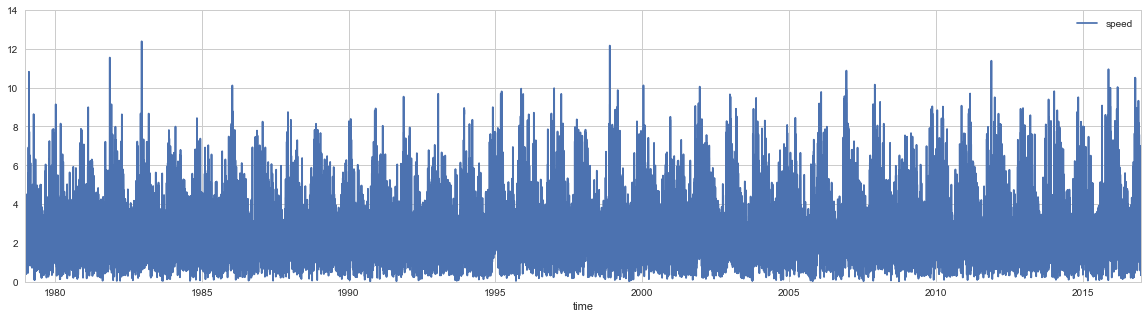

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

True


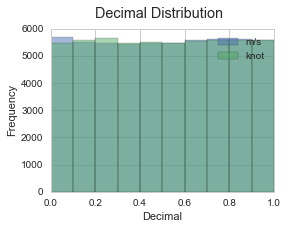

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    if 'knot_unit' not in globals():
        knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

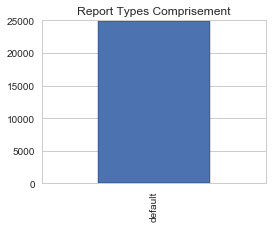

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

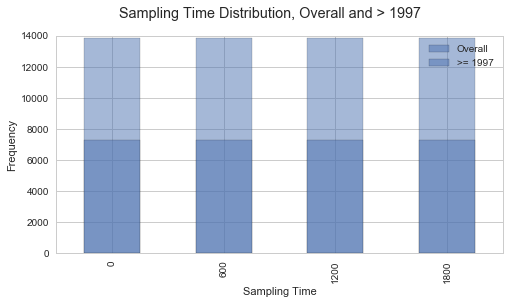

In [12]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


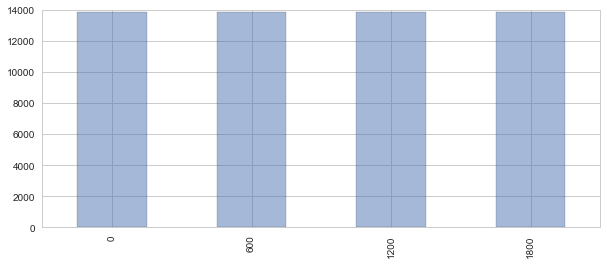

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  24.078704   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  23.650253   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  22.451227   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  22.134794   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  21.281738   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  21.144373   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  21.028658   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  20.437946   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  20.385483   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  19.740880   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  246.835090  19821216  1200  default   default   
1998-11-24 06:00:00  249.041844  19981124   600  default   default   
1981-11-14 18:00:00  250.625821  19811114  1800  default   default   
2011-11-22 12:00:00  253.506926  20111122  1200  default   default   
2015-11-17 18:00:00  230.964323  20151117  1800  default   default   
2006-12-15 06:00:00  244.513476  20061215   600  default   default   
1979-02-13 12:00:00  254.272090  19790213  1200  default   default   
2016-10-16 00:00:00  258.635193  20161016     0  default   default   
2016-10-14 18:00:00  257.134694  20161014  1800  default   default   
2007-12-03 12:00:00  250.866853  20071203  1200  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
1982-12-16 12:00:00    203.164910   8.894649      10.880182  
1998-11-24 06:00:00    200.958156   8.678268       8.442134  
1981-11-14 18:00:00    199.374179   6.432980       7.487778  
2011-11-22 12:00:00    196.493074   7.372156      14.837922  
2015-11-17 18:00:00    219.035677   6.392373       3.060021  
2006-12-15 06:00:00    205.486524   5.186322       5.942835  
1979-02-13 12:00:00    195.727910   4.819274       8.905463  
2016-10-16 00:00:00    191.364807  10.787609      12.553456  
2016-10-14 18:00:00    192.865306   4.271815       6.448148  
2007-12-03 12:00:00    199.133147   7.809246       1.401702

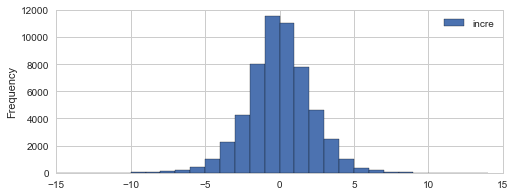

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  24.078704   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  23.650253   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  22.451227   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  22.134794   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  21.281738   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  21.144373   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  21.028658   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  20.437946   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  20.385483   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  19.740880   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  246.835090  19821216  1200  default   default   
1998-11-24 06:00:00  249.041844  19981124   600  default   default   
1981-11-14 18:00:00  250.625821  19811114  1800  default   default   
2011-11-22 12:00:00  253.506926  20111122  1200  default   default   
2015-11-17 18:00:00  230.964323  20151117  1800  default   default   
2006-12-15 06:00:00  244.513476  20061215   600  default   default   
1979-02-13 12:00:00  254.272090  19790213  1200  default   default   
2016-10-16 00:00:00  258.635193  20161016     0  default   default   
2016-10-14 18:00:00  257.134694  20161014  1800  default   default   
2007-12-03 12:00:00  250.866853  20071203  1200  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
1982-12-16 12:00:00    203.164910   8.894649      10.880182  
1998-11-24 06:00:00    200.958156   8.678268       8.442134  
1981-11-14 18:00:00    199.374179   6.432980       7.487778  
2011-11-22 12:00:00    196.493074   7.372156      14.837922  
2015-11-17 18:00:00    219.035677   6.392373       3.060021  
2006-12-15 06:00:00    205.486524   5.186322       5.942835  
1979-02-13 12:00:00    195.727910   4.819274       8.905463  
2016-10-16 00:00:00    191.364807  10.787609      12.553456  
2016-10-14 18:00:00    192.865306   4.271815       6.448148  
2007-12-03 12:00:00    199.133147   7.809246       1.401702

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.002391      1
0.002977      1
0.003838      1
0.004358      1
0.014863      1
0.016250      1
0.040082      1
0.051632      1
0.071726      1
0.072316      1
0.073573      1
0.076523      1
0.087169      1
0.092352      1
0.096630      1
0.102869      1
0.105455      1
0.111509      1
0.118384      1
0.119396      1
0.120284      1
0.126174      1
0.126369      1
0.126540      1
0.142559      1
0.149077      1
0.152135      1
0.152149      1
0.162784      1
0.169671      1
             ..
359.875806    1
359.880552    1
359.880698    1
359.883659    1
359.891486    1
359.893570    1
359.896366    1
359.899408    1
359.912579    1
359.921823    1
359.922851    1
359.927531    1
359.936378    1
359.943001    1
359.949821    1
359.951458    1
359.952294    1
359.955081    1
359.963386    1
359.969465    1
359.970756    1
359.977020    1
359.980705    1
359.983227    1
359.984649    1
359.985311    1
359.986719    1
359.986844    1
359.988308    1
359.992136    1
Name: dir, dtype: int64

0 10


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0147159479808


Series([], Name: speed, dtype: int64)


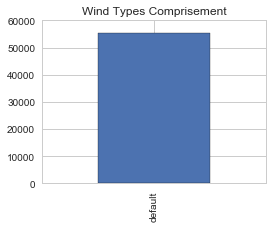

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

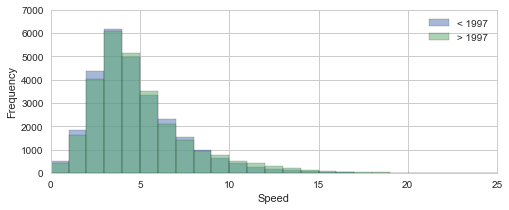

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

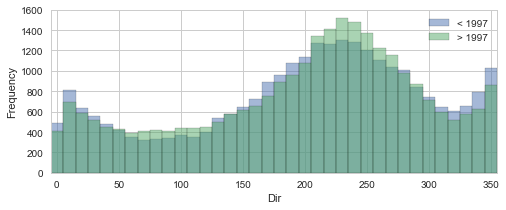

In [22]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


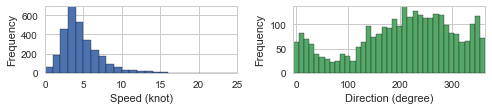

1981 - 1985


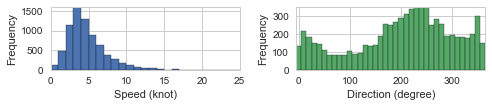

1986 - 1990


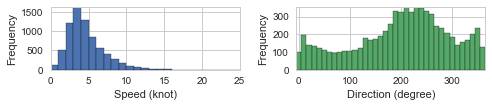

1991 - 1995


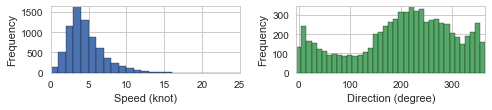

1996 - 2000


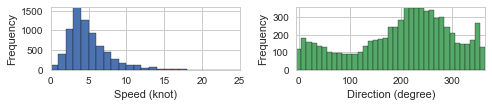

2001 - 2005


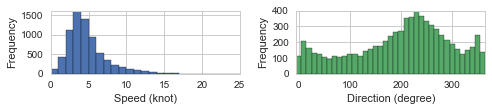

2006 - 2010


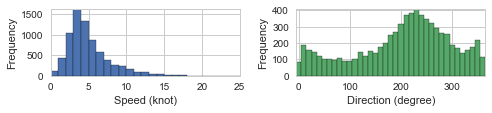

2011 - 2015


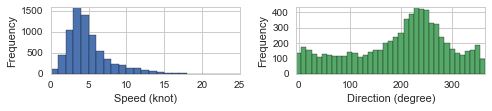

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 9.0)

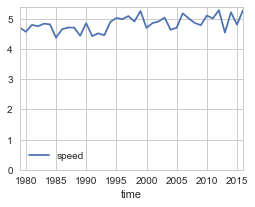

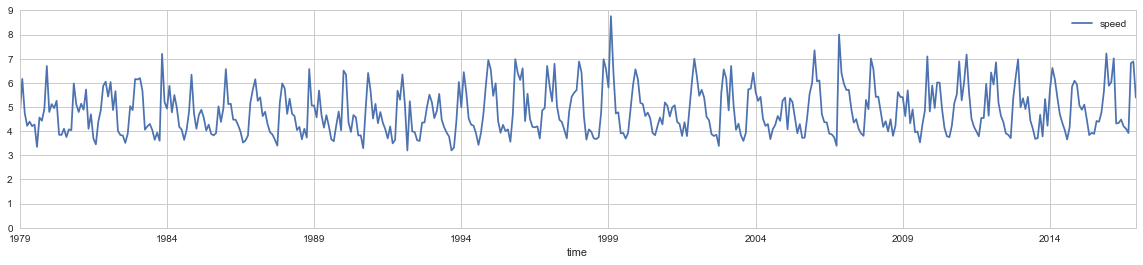

In [25]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD7pJREFUeJzt3X9QVOW/B/D3wsrusguIQurXQAEjr5IRothUNtWYlaXT
1RJjpBntjjVj5phkWSriTjJqPyaGHJuhGcIa88v1zqjdtJzsq+Wv4IIJhDqmrKyAAbvL7p5d9tdz
/+DLBp5dVji7Z3fZz+svPQ9nz2ePvjm/nvM8EsYYAyFkRKKCXQAh4YwCRIgAFCBCBKAAESIABYgQ
AShAhAhAAQoBjDG89tpr2L9/v3uZXq/Hxo0bkZeXh0cffRSfffYZXC6Xu91kMmHz5s2YN28e5s2b
h02bNkGn07nb7XY7SkpKkJeXh7y8POzatQtOp1PU7xUJKEBB5nQ6UVxcjNOnTw9a/uabb6K5uRl7
9+5FeXk5fvzxR+zZs8fdvn37dly9ehVffvklKioqcPXqVXzwwQfu9o8//hi//PIL9u3bh08++QSH
Dx/Gvn37RPteEYORoNFoNCw/P5898cQTLDc3l1VVVTHGGGtoaGCZmZmssbHR/bN1dXVs5syZzGw2
M8YYy8nJYUeOHHG3Hz58mGVnZzPGGLNarezBBx9kJ06ccLcfOnSIPfzww8zpdIrx1SIGHYGCqK6u
Dunp6Th06BDi4uLcyzUaDeRyOWbMmOFeNn36dNjtdjQ0NAAAEhMTceTIERiNRphMJhw9ehRZWVkA
gD/++AMWiwVz5851r5+bm4uuri5oNBqRvl1kkAa7gEi2ePFiLF68mLc8OTkZVqsV3d3dGDduHABA
q9UCALq7uwEAO3bsQFFREebMmQMASElJwTfffAMA6OjogEKhGBTK5ORkAEB7ezumTp0asO8UaegI
FIJmzZqFKVOmYNu2bTAYDNDpdCgtLYVUKoXdbgcA/Pnnn0hLS0NlZSUqKysRFxeHoqIiMMZgsVgg
k8kGfWZMTAwAwGazif59RjM6AoWgmJgYlJWVYcOGDcjLy4NCocDatWvR2NgIlUoFjUYDtVqNY8eO
YcqUKQCAsrIyPPXUU7hw4QLkcjkvKP1/VygUon+f0YwCFKLuv/9+fPfdd+jq6oJKpYLT6cSuXbuQ
kpKChoYGyOVyd3gAYPLkyUhMTMTNmzcxbdo0cBwHk8kElUoFAPjrr78AABMmTAjK9xmt6BQuBBkM
BrzyyivQarUYP348ZDIZTp48ieTkZGRkZGDChAngOA6tra3udTo7O6HX65Gamorp06dDoVCgtrbW
3V5TU4OkpCSkpqYG4yuNWhSgEJSQkIDe3l7s3LkTN27cwOnTp1FSUoK1a9dCIpEgOzsbWVlZKCoq
QkNDA5qamrBhwwZkZWUhNzcXcrkcy5YtQ0lJCWpra3H27Fl89NFHKCwsDPZXG3UkjIn7Qt3A34rk
b+vWrcOiRYuwcOFCAMDt27dRUVGBK1euID4+HosWLcLTTz/t/nmDwYD9+/fj0qVLAIAHHngAK1eu
RHx8PIC+a57KykqcO3cOY8aMwfz585Gfn4+oKPqd6cvs2bPv/ofFfvBUU1Mj9iY9CoU6QqEGxkKj
jlCogbHh10G/jggRgAJEiAAUIEIEoAARIgAFiBABwrongsvlGvQS2Z0SExPpti0JqLAOkE6nw9fn
/xvKeBWvzdxjQkHeUowfPz4IlZFIEdYBAgBlvApxY+ODXQaJUHR+Q4gAFCBCBKAAESJAWF8DMcZg
t9lh9/CWpd1mB6OJJ0iAhXWAOI6DtsOAeDv/QNrTbQDHcUGoikSSsA4QAERLpZCOGeNxOSGBRtdA
hAhAASJEAJ/nOS6XC8XFxbh8+TJiYmKgVqsHDWZx9OhRVFZWIjo6GpmZmSguLqbuMyRi+PyffuLE
CdhsNnz77bd4++23UVpa6m6zWq349NNP8dVXX+HAgQMwmUw4efJkQAsmJJT4PALV1tbiscceAwBk
Z2e7h5YF+sYvO3DggHusMYfDwRvQz9tn+kN7ezv0Bj2cEn6b0aDHpUuX3MM5BbIOIUKhBiA06giF
GobLZ4AGji0GANHR0XA4HJBKpYiKikJSUhIAoKqqChzH4ZFHHvG50WEN2jAEjUaD37gWJPx7+NuB
olnfQBvehnGqra31Wx0jFQo1hEodoVBDfx3D4TNAKpUKZrPZ/XeXywXpgFvELpcLu3fvxvXr11FW
VgaJxMPhgJBRyuc1UE5ODk6dOgUAqK+vR2Zm5qD2rVu3ore3F59//jkNG0sijs8j0IIFC/Drr78i
Pz8fjDF8+OGHOHLkCDiOQ1ZWFqqrq5Gbm4tXX30VAFBYWIgFCxYEvHBCQoHPAEVFRaGkpGTQsoyM
DPefm5ub/V+VHzD0dfUZePo5qJ36yRE/GLX9XZwOB2qatOgwxvDarFYOSok1CFWR0WbUBggAZDIF
FLGxnht79eIWQ0alURsg5nLB2GOAQd/Na7NwFoyVuTysRcjwhEWAvI2+o9Pp4O1SxmK2oN5+Abfk
rbw2o96A+ff8h7/LJBEoLALkbfQd7fWbsIH/KkM/uSoWyoQ43nKHw+73GklkCosAAZ5H34lVqWAx
9QapIkLodQZCBKEAESJAWJzCeRs8xOGkaxkSXGERIG+Dh7Tf7kGMkvrfkeAJiwABngcPiZJ6vwNH
iBjoGogQAShAhAhAASJEAAoQIQJQgAgRIGzuwvkTc7nQ09ODrq4uXhtNC0mGIyIDxJk5nDVpYLg4
+MGs2WjCq48sd480RIgvERkgp8MJC5PCeMeD2R7OSTM6kGGJyAABQHRUNO/BLM3oQIaLTvYJEYAC
RIgAPgPkcrmwdetWLF++HCtXrkRLSwvvZywWC/Lz83Ht2rWAFElIqBI0OwMAXLp0CQUFBbh582bA
iiQkVPkM0FCzMwCAzWZDeXk50tPTA1MhISFM0OwMwMhmWhjuCPjepjHp6TFAKhsDWTd/6Kq7aeu+
o+1upkTxt1CZ0iMU6giFGoZL8OwMIzHc0HmbxsTcbYBUJsU4D9Ob+Grjejlem68pUfwtlKb0CHYd
oVBDfx3DIXh2BkIimaDZGZYvXy5GjYSELMGzM/SrqqryX1WEhAnquzKAy+WCVqv12j558mRER0eL
WBEJdRSgAUwGI6pq/hf3tE7it+kNWLewQLQbDCQ8UIDuoIqPR8J4/p07QjyhvnCECEABIkQAChAh
AoTMNRBjzOvboBzHgaYEJqEoZAJkMplw7F8XIZPxx7pubb0Bp9wRhKr+xv49S55SqfTYToORRKaQ
CZBOp0PNX+cQNzaB13ZLr4FqXLyHtcTDmTn8T8MxTOyayGujwUgiV8gECAAUXqZklCu9zLQtIqfD
iR4ASjv/KEODkUSukApQqJNG82eIAGgwkkhGJ+2ECEABIkQAChAhAtDJux8w9D2rGvjmbr/Y2FhI
JBL+SmRUoAD5gdPhQE2TFh3GmEHLrVYOj+akeX12RMIfBcgPmMsFW68NNpt10PJeay9cLleQqiJi
oAD5gcVsQb39Am7JWwct79HrkalVIiUlxeN6jFEHpXBHAfITuYeHwFarxeOpXV8bB6XEyltOwktQ
AuRpYiudTofR+AtZJlNAEeulJ0WvXtxiiN8FJUD/vHiUt0zbooVDKg9CNYHDXC4Yewww6PmDO3Ic
B7nL7PHOHUB378JFUAJ058RWAGC0OBCjdAahmsDxdm0EALrOTiRx/4B8XAd/PYsZOdMneL17R+EK
HUEJkKf+ZFFS/rLRwNO1EQBYODPsul7enTsA0Ot0OHaqHWMT+GMzWK0c5s+5D3Fx/M+kYInPZ4Bc
LheKi4tx+fJlxMTEQK1WY8qUKe72n376CeXl5ZBKpVi6dClefvnlgBY8WljMFtxytSLqNv8//K0b
GkhjpLgn+h+

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFZtJREFUeJztnXtwk1X6xz9N0zZp0pZSLj91KUpRvCACosUZF3ZxERcv
O7OwtuDU2Vl3R3dH0WG3UxArLJQFnBVnlnWY6ugs0+osDLKueFlEYRbFRaRQlZsoakvLpbfckyZp
cn5/hL5N0ktqmyZvkvOZ6UzO++a8eU6a73suz/M+J00IIZBIJDFFE28DJJJURApPIokDUngSSRyQ
wpNI4oAUnkQSB6TwJJI4IIWXYAgh+O1vf0ttba1yzGw286c//Yni4mLuvPNO/va3v+H3+5Xzdrud
p59+mtmzZzN79mwqKiowmUzKea/Xy9q1aykuLqa4uJjnnnsOn88X03alGlJ4CYTP52PNmjV89NFH
IcefeOIJTp8+zdatW3nxxRfZu3cvf/3rX5Xzf/7zn/n666959dVXeeWVV/j666955plnlPObN2/m
448/prq6mhdeeIG33nqL6urqmLUrJRGShKCxsVGUlpaKn/70p2LWrFmipqZGCCHE8ePHxXXXXSdO
nDihvPfYsWPipptuEg6HQwghxMyZM8Xu3buV82+99ZaYPn26EEKIzs5Occstt4gPPvhAOb9r1y5x
xx13CJ/PF4umpSSyx0sQjh07xqRJk9i1axc5OTnK8cbGRnQ6HTfeeKNy7Prrr8fr9XL8+HEA8vPz
2b17NzabDbvdzttvv83UqVMBOHXqFC6Xi9tvv12pP2vWLNrb22lsbIxR61IPbbwNkAyOBx54gAce
eKDX8bFjx9LZ2UlHRwejR48GoLm5GYCOjg4A1q1bR3l5ObfddhsAEyZM4PXXXwfg0qVL6PX6EDGP
HTsWgIsXL3L11VePWJtSGdnjJTjTpk1j4sSJrF69GovFgslkYuPGjWi1WrxeLwDffvst11xzDdu2
bWPbtm3k5ORQXl6OEAKXy0VWVlbINTMzMwHweDwxb0+qIHu8BCczM5MtW7awfPlyiouL0ev1PP74
45w4cQKj0UhjYyNVVVX85z//YeLEiQBs2bKFu+66i8OHD6PT6XoJrLus1+tj3p5UQQovCZgyZQrv
vPMO7e3tGI1GfD4fzz33HBMmTOD48ePodDpFdABXXXUV+fn5nDt3jsmTJ+N0OrHb7RiNRgBaW1sB
GD9+fFzakwrIoWaCY7FYWLp0Kc3NzRQUFJCVlcX+/fsZO3YsRUVFjB8/HqfTSVNTk1Knra0Ns9lM
YWEh119/PXq9nrq6OuX8kSNHGDNmDIWFhfFoUkoQUXh+v59nn32WkpISysrKaGhoCDm/b98+Fi1a
RElJCTt27BiwTnt7O7///e956KGHKC0tlatmUSAvLw+3282GDRv4/vvv+eijj1i7di2PP/44aWlp
TJ8+nalTp1JeXs7x48c5efIky5cvZ+rUqcyaNQudTsfixYtZu3YtdXV1/O9//+P555/n4YcfjnfT
kpo0IQZ+EPb9999n3759bNy4kfr6eqqrq9m6dSsQiHhYuHAhO3fuRK/Xs2TJEqqrqzl69GifdVas
WMGcOXNYuHAhhw4dorOzk5/85Cf9fnbwXVjSw7Jly7j33ntZsGABAC0tLbzyyiucOXOG3Nxc7r33
Xu6++27l/RaLhdraWr788ksAbr75ZsrKysjNzQUCc7pt27Zx6NAhMjIymDNnDqWlpWg0ckAUiVtv
vXVI9SLO8erq6vjxj38MwPTp0xXfEMDZs2cpLCwkLy9PMeKzzz6jvr6+zzpHjx5lypQp/PrXv+aq
q65i1apVEQ0casNiSV1dXUztPHjwYK9jP//5zwesM2/evAHtvOOOO6JiWzSI9fc5VIbTMUQUXvCk
GyA9PZ2uri60Wi12uz3E/2MwGLDb7f3WaW5uJjc3l3/84x/8/e9/5+WXX+bJJ58c8PMTpdeTdkaX
RLFzqEQUntFoxOFwKGW/349Wq+3znMPhICcnp986o0aNYt68eUDgDvzCCy9ENDBR7nzSzuiRSHYO
lYiD+JkzZ3LgwAEA6uvrue6665RzRUVFNDQ0YDab8Xg8HDlyhBkzZvRb59Zbb+W///0vAJ999hmT
J08esuESSSITscebP38+Bw8epLS0FCEEf/nLX9i9ezdOp5OSkhJWrFjBI488ghCCRYsWMX78+D7r
AFRUVPDMM8/wz3/+E6PRyPPPPz/iDZRI1EjEVc14kkhDDmln9EgFO+V6sUQSB6TwJJI4IIUnkcQB
KTyJJA5I4UkkcUAKTyKJA/J5PEm/CCFwOp0hx7Kzs0lLS4uTRcmDFJ5EIVxoDoeDo6db0OuzAejs
dHLnzGswGAzxMjFpkMKTKDidTj4++h06XUBoZlMbumwj+uzsOFuWfEjhSULQ6bIVoblcoYITQoQE
v4Mceg4VKTxJv/j9fhw2K5rLujJ1dGA2d5CfXwDIoedwkMJLUfpaOHE4HASH7tptVg5f+phRnoDQ
TG1tzL5yrhx6RgEpvBQlfD4HPXO67KAeTG80YMgLPOzc2emKuZ3JihReChM8n4PeczrJyCEd6BJJ
HJA9nkQhfDHFZrUgNKp9XDOhkcJLEbr3Seh2B4QvpEDvxZTzLY0YR+fG3NZUQAovRbDb7Rz6ooEO
V2A/BIulgzHjrghZSIHQxRSdYeA5n/TrDR0pvBTBZDLxjfcUnXbn5XIbs/VzKSgYM+Rrdna6OPSF
mby8/Mtl6dcbLDFN4d7N7t27KSkpiWIzJINBZ8jGkJeDIS8HvTE64sjS6dFnB1ZHg10TasLv99Pe
3h7yF7xHfDyI2ON98MEHeDwetm/fTn19PRs3bgxJ4b5hw4aQFO7z5s3j6NGj/dY5efIkO3fu7DW/
kCQe4YsxTqcTmy1UfGoYeppMJl779A0MuYEkyw6rnYeKF1FQUBA3m2Kawt1kMrF582aefvppKisr
B2VgomQUVrudFy9eBHp2ibVYzDSaGvB29dz5m5u+x6I1gzYdAKvVgjYrg6x+6jQ3fc/X7pPk5I8K
vL/DxMmT1zP+/64EwN3pYvKV+l777Ol0uohijOb3aTabsTvtiMu/dofTTn19PaNGjYraZ/xQYpbC
3ePxsGrVKlauXNlrB9KBSPY0byNFeEiYwWBg74XPle2a/W4P+ZpRjB0zWnmPy27BounZ0tnRYUGb
pVXKwttFYe5EJl49CQCtBqwOE6PHBbZubtfpmJx7rXK+rbWFSx2t5NIjPLfbxT1zp4T8bsKJ9vfZ
3t7O96cukTMqsEJry7Yy/Ybpw+7xRnTvhGilcD99+jQNDQ2sWbMGt9vNN998w/r16we1cYnkhxMe
EtbYcA6/z6ecdzlc1HsPc17Xs29etN0HdpuV+o7PGJXW8wO3mS0UmwoHFF4qEFF4M2fOZP/+/Sxc
uHDAFO7Z2dkcOXKERx55hLS0tF51pk2bxjvvvANAU1MTy5cvH5To2tvbQ8r5+fly+6hBEhwSlpXV
e1tlnTFbcR1AZPfBUAh2TwB0dXmj/hmJSExTuA+FN0/tUV6rYVKsVvx+PyaTSSnbbDZMpnY8ns5A
2WoZ9oKW8PuxWS1YzB091wyKbIl0Pl4IIfB6vHgv7+3u9XjjvrgXUXgajYa1a9eGHCsqKlJez5s3
T9kBaKA6wfzoRz9SXA+R6B6XS0IJF1pHRwfvntmH8XLv0vzdOTocXsZc3sf8fEsj/mF6bcOHp+FD
00jn44XT6aT5koVcb2CkZO2w9HokKtZIB3qCEr5E3nLuAro8A7psHQCZ+iz0ZIREoTjdw/+xBQ9P
+xqaRjofTvgNpPtYtEnXatFmZCiv4038LZAMGUOuURkRmFpNXGi10pUecIxfbLGSaeg9r1MbffnY
bsoqilBrYML

Wall time: 27.4 s


In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEmdJREFUeJzt3X1MleXjx/HP4SCoB5So3Fo+BCqb5szUrJYP+dua1jKt
qQlNa2oZM01LRPGBGpgylX3LQsPY2o4iMW3LftZqlWUpWaPQKZaLn6PEh1D5GgdF8HD//nCdb6R9
OdeBw3l6v/6S49XpurrXh/vc577uj82yLEsAAK9FBXoCABBqCE4AMERwAoAhghMADBGcAGCI4AQA
Q14F56FDhzRz5sxWr3344Yd68sknPT+XlpbqiSee0PTp07V3715JUmNjoxYsWKC0tDQ9++yzunDh
giSpoqJC06ZN04wZM/Tmm2921FoAoFO0GZxbt27VypUrdeXKFc9rlZWV2rlzp/68BbS2tlZOp1Ml
JSUqKipSfn6+mpqatGPHDqWkpKi4uFhTpkxRQUGBJCk7O1sbN27Ujh07dOjQIVVWVvppeQDQ8doM
zr59+2rTpk2en+vq6pSfn6+srCzPa4cPH9bdd9+tmJgYxcfHq2/fvvrpp59UXl6uMWPGSJLGjh2r
srIyuVwuNTU1qW/fvrLZbBo9erQOHDjgh6UBgH9EtzVgwoQJOnnypCTJ7XZrxYoVWr58uWJjYz1j
XC6X4uPjPT87HA65XK5WrzscDtXX18vlcikuLq7V2N9++63NiZaXl3u/KgAwMGLECKPxbQbnXx09
elTV1dV65ZVXdOXKFf3yyy9as2aN7rvvPjU0NHjGNTQ0KD4+XnFxcZ7XGxoa1KNHj1av/fV1b5gu
LpSUl5ezvhDG+kKXLydlRt+qDx06VHv27JHT6VR+fr4GDBigFStWaOjQoSovL9eVK1dUX1+vqqoq
paSkaPjw4frqq68kSfv27dOIESMUFxenLl266Ndff5VlWfrmm280cuRI44kDQKAYnXH+k1tvvVUz
Z85UWlqaLMvS4sWLFRsbq9TUVGVmZio1NVVdunTRxo0bJUmvvvqqlixZIrfbrdGjR+uuu+7qiGkA
QKewhcrTkcL5o4LE+kId6wtdvqyNG+ABwBDBCQCGCE4AMERwAoAhghMADBGcAGCI4AQAQwQnABgi
OAHAEMEJAIYITgAwRHACgCGCEwAMEZwAYKhDnscZKdxut6qqqrwe379/f9ntdj/OCEAgeBWchw4d
0oYNG+R0OnXs2DHl5OTIbrcrJiZGeXl5uuWWW1RaWqqSkhJFR0crPT1d48ePV2NjozIyMnT+/Hk5
HA7l5eUpMTFRFRUVWrNmjex2u0aPHq0XXnjB3+vsEFVVVZq5vFjde/Zqc+yli7/LuTZNKSkpnTAz
AJ2pzeDcunWrdu/erW7dukmS1qxZo1WrVmnQoEEqKSnR1q1bNXfuXDmdTu3atUtXrlxRWlqaHnjg
AU898IIFC7Rnzx4VFBRo5cqVys7O1qZNm9SnTx8999xzqqys1ODBg/2+2I7QvWcvxd10e6CnASCA
jOuB8/PzNWjQIEnXPrrGxsZSDwwgohjVA0tSr17XPqb+8MMP2rZtm7Zv366vv/7a7/XAUuArgqur
q43GHzlyRPX19V6PD/T6/I31hbZwX58Jn74c+uijj7R582YVFhYqMTHxhpW/4VgPHB8fL/3vGa/H
DxkyxOtrnOHc6SKxvlAXzuvzez2wJH3wwQfatm2bnE6n+vTpI0nUAwOIKEZnnG63W2vWrNFtt92m
BQsWSJLuueceLVy4kHpgABHDq+Ds3bu3SktLJUnffffdDcdMnz5d06dPb/Vat27d9MYbb1w3dtiw
YZ73A4BQw84hADBEcAKAIYITAAwRnABgiOAEAEMEJwAYIjgBwBDBCQCGCE4AMERwAoAhghMADBGc
AGCI4AQAQwQnABgiOAHAEMEJAIaMe9Wrq6u1bNky2Ww2DRw4UNnZ2YqKioqIXnUTVkuLTpw44fV4
t9vtx9kA6EjGvepr167VokWLdO+992r16tX6/PPPNWzYsIjpVffW5fparS48p+49q9oce+ni78p8
aqhGjRrVCTMD0F5tBuefvepLly6VJB09etTzP/jYsWO1f/9+RUVFeXrVY2JiWvWqz5071zO2oKCg
Va+6JE+vujfBGeh6UtN64O49eynuptu9Hh/o9fkb6wtt4b4+E8a96pZlyWazSWrdld4ZveqBric1
rQc2Fej1+VM418tKrC+UdUo9cFTUf/6R/9aV7o9edQAIBsbBOXjwYB08eFDSta70kSNH0qsOIKIY
9apLUmZmplatWqX8/HwlJydrwoQJstvt9KoDiBjGvepJSUnatm3bdWPoVQcQKbgBHgAMEZwAYIjg
BABDBCcAGCI4AcAQwQkAhghOADBEcAKAIYITAAwRnABgiOAEAEMEJwAYMn46Urhxu92qqmq73kKS
UYcQgPAV8cFZVVWlmcuL1b1nrzbHnj95TDf3HtQJswIQzCI+OCXvu4EuXTzbCbMBEOx8Cs7m5mYt
W7ZMNTU1ioqKUk5OjqKjo9tdGwwAocCnL4e++uorXb16VSUlJZo/f77+9a9/eWqDi4uLZVmWPv/8
c9XW1srpdKqkpERFRUXKz89XU1OTpza4uLhYU6ZMUUFBQUevCwD8xqfgTEpKktvtVktLi1wul6Kj
o6+rDT5w4IAOHz7sqQ2Oj49vVRs8ZswYz9iysrKOWxEA+JlPH9W7d++umpoaPfzww6qrq9OWLVv0
/ffft6s22Bv+6HU27Ur3p3DvrWZ9oS3c12fCp+B89913NXr0aL388ss6ffq0nn76aTU3N3v+3pfa
YG/4o9fZ313pJsK1t1oK715uifWFsk7pVZekHj16eM4Ye/bsqatXr7a7NhgAQoVPZ5zPPPOMsrKy
lJaWpubmZi1evFhDhgxpd20wAIQCn4LT4XDo9ddfv+719tYGA0AoYK86ABgiOAHAEMEJAIYITgAw
RHACgCGCEwAMEZwAYIjncQYBq6VFp06d0vHjx70a379/f9ntdj/PCsA/ITiDwOX6Wjn32rTrh8/a
HHvp4u9yrk1TSkpKJ8wMwI0QnEHC26fQAwg8rnECgCGCEwAMEZwAYIjgBABDBCcAGPL5W/W3335b
X3zxhZqbm5WamqpRo0ZRDwwgIvh0xnnw4EH9+OOP2rFjh5xOp86cOUM9MICI4VNwfvPNN0pJSdH8
+fP1/PPP68EHH6QeGEDE8Omjel1dnU6dOqUtW7bo5MmTSk9Pl2VZ1AN3kiNHjnj93yyYhHu9LOuL
HD4FZ0JCgpKTkxUTE6Pk5GTFxsbqzJn/VOxSD+xfQ4YMCbktl+FcLyuxvlDWafXAI0aM0Ndffy3L
snT27FldvnxZ999/P/XAACKCT2ec48eP1/fff6+pU6fKsiytXr1avXv3ph4YQETw+XakpUuXXvca
9cAAIgE3wAOAIYITAAwRnABgiOAEAEMEJwAYIjgBwBDBCQCGCE4AMERwAoAhghMADBGcAGCI4AQA
Qz4/5AOBYbW06MSJE16P79+/v+x2ux9nBEQegjPEXK6v1erCc+res6rNsZcu/i7n2rSQe+gxEOwI
zhDUvWcvxd10e6CnAUQsrnECgKF2Bef58+c1btw4VVVVqbq6WqmpqUpLS1N2drZaWlokSaWlpXri
iSc0ffp07d27V5LU2NioBQsWKC0tTc8++6wuXLjQ/pUAQCfxOTibm5u1evVqde3aVZLoVQcQMXy+
xpmXl6cZM2aosLBQkq7rVd+/f7+ioqI8veoxMTGtetXnzp3rGettcFIPbC6YqoTDvV6W9UUOn4Lz
/fffV2JiosaMGeMJzs7oVace2FywVAmHc72sxPpCmS+/EHwKzl27dslms6msrEzHjh1TZmZmq+uU
/upVB4Bg4NM

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGFxJREFUeJzt3XtsU+f9x/G3c3EabAfKUCX0Y6GEYjGIIgIINjHSIhWC
qjIoAms2MlIDCLIOGjogEO4KoosYbAsivYn9Ey5pRKYKjU1tQZRIQPnDW4kSmqFZWSQua7msxXbB
geT8/ugP75clJCfBtySf11/w+JjzPU+cD8/xeZ5zLIZhGIiISI9SEl2AiMhAoLAUETFBYSkiYoLC
UkTEBIWliIgJCksRERPSetugvb2dbdu20dLSgsViYffu3WRkZLB582YsFgsTJkxg586dpKSkUFtb
S01NDWlpaRQXFzNnzhwePHjAxo0buXPnDjabjYqKCkaOHBmPYxMRiZpeR5Znz54FoKamhpKSEn77
29/y9ttvU1JSwrFjxzAMgzNnznDr1i2qq6upqanh8OHDHDhwgLa2No4fP47T6eTYsWMsWrSIqqqq
mB+UiEi09TqyfPnll3nppZcAuHHjBllZWVy4cIEZM2YAUFBQwPnz50lJSSE/Px+r1YrVaiU7O5vm
5mZ8Ph8rV66MbKuwFJGBqNewBEhLS6O0tJRPP/2UyspKzp8/j8ViAcBmsxEIBAgGgzgcjsh7bDYb
wWCwU/vjbXvj8/n6cywiIr2aNm1av95nKiwBKioq2LBhAy6Xi3A4HGkPhUJkZWVht9sJhUKd2h0O
R6f2x9ua0d8Dijafz5cUtSRLHaBankS1dC/ZaumvXr+z/Oijj3jvvfcAyMzMxGKxkJuby6VLlwCo
r69n+vTp5OXl4fP5CIfDBAIB/H4/TqeTqVOncu7cuci2ydJpIiJ90evIct68eWzZsoVly5bx6NEj
ysrKGD9+PNu3b+fAgQPk5ORQWFhIamoqXq8Xj8eDYRisX7+ejIwM3G43paWluN1u0tPT2b9/fzyO
S0QkqnoNy2HDhvH73/++S/uRI0e6tLlcLlwuV6e2zMxMKisrn6JEEZHE06R0ERETFJYiIiYoLEVE
TDA9dUhkKGhvb8fv9z/x9fHjx5OamhrHiiRZKCxF/h+/3493yzGGDX+uy2vfffs11W97cDqdCahM
Ek1hKUNOT6PHlpYWhg1/Dvuz/xPnqiTZKSxlyOlp9Hjn2pf8YMyPElCVJDuFpQxJTxo9fvftVwmo
RgYCXQ0XETFBI0sRk4yODlpaWp74ent7exyrkXhTWIqYdD9wix3v32bY8K4Xh7779mtKl+VF7vMq
g4/CUqQPdKV86NJ3liIiJigsRURM0Gm4DEq9TTwX6SuFpQxKmngu0aawlEFLE88lmvSdpYiICQpL
ERETejwNf/jwIWVlZVy/fp22tjaKi4sZPXo0q1ev5vnnnwfA7XbzyiuvUFtbS01NDWlpaRQXFzNn
zhwePHjAxo0buXPnDjabjYqKCkaOHBmP4xIRiaoew/LkyZOMGDGCffv28c0337Bo0SLeeOMNXn/9
dYqKiiLb3bp1i+rqaurq6giHw3g8HmbNmsXx48dxOp2sXbuWU6dOUVVVxbZt22J+UCIi0dbjafj8
+fN58803ATAMg9TUVBobG/nss89YtmwZZWVlBINBGhoayM/Px2q14nA4yM7Oprm5GZ/Px+zZswEo
KCjg4sWLsT8iEZEY6HFkabPZAAgGg6xbt46SkhLa2tpYunQpubm5vPPOOxw6dIiJEyficDg6vS8Y
DBIMBiPtNpuNQCBgujCfz9ef44mJZKklWeqA5K+ltbU1AZUkf78kSjLV0l+9Th26efMmb7zxBh6P
hwULFnDv3j2ysrIAmDt3LuXl5UyfPp1QKBR5TygUwuFwYLfbI+2hUCjyPjOmTZvW12OJCZ/PlxS1
JEsdMDBqcTgc8Kd/xb2eZO+XREi2Wvqrx9Pw27dvU1RUxMaNG1myZAkAK1asoKGhAYCLFy8yefJk
8vLy8Pl8hMNhAoEAfr8fp9PJ1KlTOXfuHAD19fVJ02EiIn3V48jy3Xff5d69e1RVVVFVVQXA5s2b
2bt3L+np6YwaNYry8nLsdjterxePx4NhGKxfv56MjAzcbjelpaW43W7S09PZv39/XA5KRCTaegzL
bdu2dXv1uqampkuby+XC5XJ1asvMzKSysvIpSxQRSTwtd5QBq729ndbW1k4XFx/TzTIk2hSWMmD5
/X4qjjYwbHjXCzm6WYZEm8JSBrRkuVmG0dHBjRs3uHr1arevjx8/ntTU1LjWJNGlsBSJgvuBW1Sf
tVD319NdXvvu26+pftuD0+lMQGUSLQpLkSjR83kGN911SETEBIWliIgJCksRERP0naVIjBkdHT3O
+9SV8oFBYSkSY/cDt9jx/m2GDe/6tEldKR84FJYicfCkK+UadQ4cCkuRBNKoc+BQWEpSa29vx+/v
GiQweNZ/a37mwKCwlKTm9/vxbjnGsOHPdXlN678lnhSWkvSSZf23DG2aZykiYoLCUkTEBIWliIgJ
CksRERN0gUdEYqanR3/AwJp032NYPnz4kLKyMq5fv05bWxvFxcW88MILbN68GYvFwoQJE9i5cycp
KSnU1tZSU1NDWloaxcXFzJkzhwcPHrBx40bu3LmDzWajoqKCkSNHxuvYRCTBenr0x0CbdN9jWJ48
eZIRI0awb98+vvnmGxYtWsTEiRMpKSlh5syZ7NixgzNnzjBlyhSqq6upq6sjHA7j8XiYNWsWx48f
x+l0snbtWk6dOkVVVVW3T4sUkcFrsEy67zEs58+fT2FhIQCGYZCamkpTUxMzZswAoKCggPPnz5OS
kkJ+fj5WqxWr1Up2djbNzc34fD5WrlwZ2fbxs8fN8Pl8/T2mqEuWWpKlDohfLa2trXHZT7JqbGwk
EAj0673J8Hnp7ef3NMcXbz2Gpc1mAyAYDLJu3TpKSkqoqKjAYrFEXg8EAgSDwU7fSdhsNoLBYKf2
x9uaNW3atD4fTCz4fL6kqCVZ6oD41uJwOOBPXU/hhorc3Nx+naYmy+elt59ff4+vv57mP5Ber4bf
vHmT5cuXs3DhQhYsWEBKyn/eEgqFyMrKwm63EwqFOrU7HI5O7Y+3FREZiHocWd6+fZuioiJ27NjB
T37yEwAmTZrEpUuXmDlzJvX19fz4xz8mLy+P3/3ud4TDYdra2vD7/TidTqZOncq5c+fIy8ujvr4+
Kf6nk+QzFG6WIQNfj2H57rvvcu/ePaqqqiLfN27dupU9e/Zw4MABcnJyKCwsJDU1Fa/Xi8fjwTAM
1q9fT0ZGBm63m9LSUtxuN+np6ezfvz8uByUDi26WIQNBj2G5bdu2bq9eHzlypEuby+XC5XJ1asvM
zKSysvIpS5ShQDfLkGSnFTwiIiYoLEVETFBYioiYoLAUETFBYSkiYoLuOiSSpPSY3OSisBRJUnpM
bnJRWEpcaJVO/wyWO/YMBgpLiQut0pGBTmEpcaNVOjKQ6Wq4iIgJCksREROS9jT86tWr3bZruoSI
JELShuXqX5/u0qbpEiKSKEkblpouITIwDJVpYUkbliLyZL2t7mlvb49bLUNlWpjCUmQA6m11T+my
vMhTWONhKEwLU1iKDFBa3RNfmjokImKCqbC8fPkyXq8XgCtXrjB79my8Xi9er5c///nPANTW1rJ4
8WJcLhdnz54F4MGDB6xduxaPx8OqVau4e/dujA5DRCS2ej0N/+CDDzh58iSZmZkANDU18frrr1NU
VBTZ5tatW1RXV1NXV0c4HMbj8TBr1iyOHz+O0+lk7dq1nDp1iqqqqm4fgCaDw1C5KipDU69hmZ2d
zcGDB9m0aRMAjY2NtLS0cObMGcaOHUtZWRkNDQ3k5+djtVqxWq1kZ2fT3NyMz+dj5cqVABQUFEQe
p/s0GhsbCQQ

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: default
Sampling time used: [0]


lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.824993     -1.857789      4.981339   
std    4.703954e-12  9.172000e-11      3.502935      4.019249      2.782402   
min    4.700000e+01  2.370000e+02    -17.817464    -21.224037      0.019720   
25%    4.700000e+01  2.370000e+02     -3.219526     -4.177964      3.175466   
50%    4.700000e+01  2.370000e+02     -1.137571     -1.442500      4.308202   
75%    4.700000e+01  2.370000e+02      1.910974      0.955862      6.058296   
max    4.700000e+01  2.370000e+02     12.199321      8.616677     22.134794   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     200.814362  2.010567e+07    900.000000    190.187829  
std       93.742468  2.872210e+04    670.843355     86.668069  
min        0.002977  2.006010e+07      0.000000      0.002385  
25%      141.233901  2.008070e+07    450.000000    125.253343  
50%      218.459009  2.010567e+07    900.000000    201.846276  
75%      266.495076  2.013070e+07   1350.000000    249.810863  
max      359.992136  2.015123e+07   1800.000000    359.994014

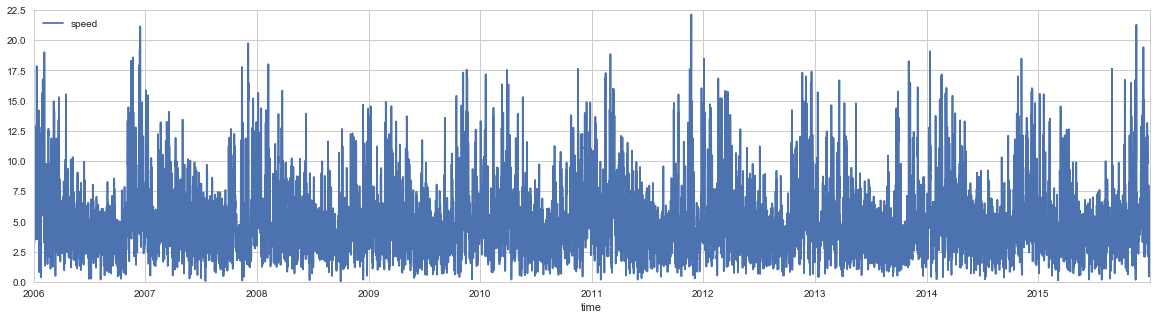

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

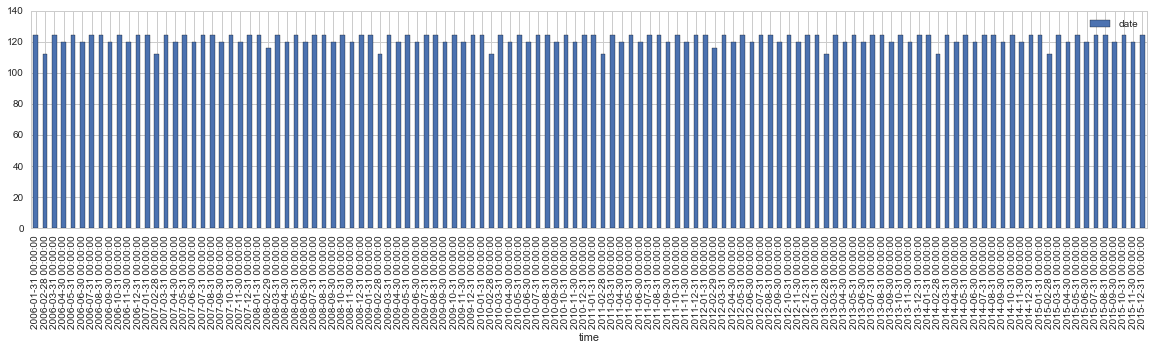

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


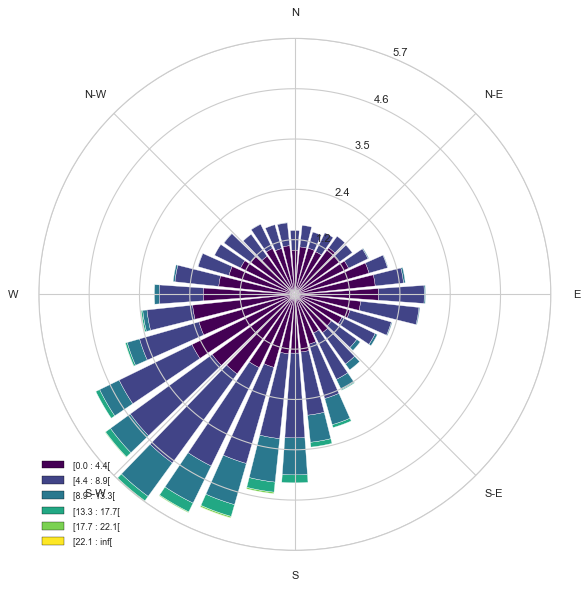

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVHXf//HXzOCwDoJ7boggudWFoOKuF95aqWmKXm6h
l/ozLX+Z2uKWpmRAoW2G3pX+upI2FbXEK7Vc6bJFmCK33JXrMgUJRBhARpz5/eHN3JIwIM7MgeHz
fDzm4cyc8z3nc5p8e5bvOV+V2Ww2I4QQNqRWugAhhPORYBFC2JwEixDC5iRYhBA2J8EihLA5CRYh
hM25KF3A/dLr9UqXIESdFRoaWu73tT5YoOKNqy30en2t3waQ7ahJHLEN1v5Rl0MhIYTNSbAIIWzO
KQ6FHM1kMnHt2rUqzevr64taLfkt6hYJlmq4du0aH29PxdPL2+p8BYY8Jg/vSsOGDR1UmRA1gwRL
NXl6eaPz9lW6DCFqJNlHF0LYnASLEMLmJFiEqGEmT57MkSNHADAajYSGhrJu3TrL9MjISH777be7
2iUnJ7Nx40YuXbrE0qVLq7y+3r17W5Z77ty5+6z+NgkWIWqY3r17k5qaCtzuhNanTx8OHjwIQHFx
Mb///jvt27e/q12/fv0YO3asQ2utiJy8FcKKF198kc2bN9t0mWPGjCEuLq7C6b169WLNmjVMnTqV
gwcPMmbMGFauXEl+fj7Hjx+ne/fupKSk8NZbb6HRaGjVqhVRUVEkJSVx/vx5xo0bR15eHjNnziQ7
O5sBAwYwa9YsFixYwJAhQ+jXrx/Jycl8/fXXxMbG2nTbSskeixA1TMeOHTl//jxms5mUlBS6d+9O
z549+f777zl8+DB9+vRhyZIlvPfee3zyySc0bdqUbdu2lVnGjRs3iIuL44svvuC7777j5MmTDt0G
2WMRwoq4uDirexf2oFarad++PcnJyTRu3BitVku/fv04cOAAJ0+eZOLEiSxZsoQ5c+YAt0OkV69e
+Pn5WZbh5+eHTqcD4KGHHuLChQtl1mHvR13LHosQNVDv3r15//336du3L3D7RtsTJ05gMpnw9fWl
WbNmrFmzhoSEBGbOnEmPHj3KtP/9998pKCigpKSEI0eO0K5dO7RaLVlZWQCcOHHCrvXbbY/FZDKx
bNkyTp06hVarZcWKFWUSdceOHXz88cdoNBqCgoJYtmwZgNU2QtQVvXr14uWXX+aNN94AQKvVotPp
6NChA2q1msWLF/PUU09hNpvx9PTkjTfe4MqVK5b2Xl5ezJ07l5ycHIYMGUJgYCBjxoxh0aJFJCUl
0aZNG7vWb7dg2bNnD0ajkY0bN5KWlkZsbCxr164Fbu+6vf322yQlJeHu7s68efPYv38/t27dqrCN
EHVJixYtOHXqVJnv1qxZY3nfp08f+vTpU2b6qFGjLO9jY2PvemzCQw89RFJS0l3rOnToEAAJCQn3
XXcpux0K6fV6y25ccHAwx44ds0zTarV88cUXuLu7A1BSUoKrq6vVNkKI2sNueywGgwEvLy/LZ41G
Q0lJCS4uLqjVaho1agTcTsnCwkJ69+7Nzp07K2xjjaOfIpebm0tGRh75hiKr8xUYrpOWVoiPj0+l
y3SWJ+HJdtQcSm6D3YLFy8uLgoICy2eTyVQmIEwmE3FxcVy4cIHVq1ejUqkqbVMRRz/tKzs7m7M5
pyu9CTE/z53g4KBK7252hieWgWxHTeK0T5ALCQkhOTkZgLS0NIKCgspMX7p0KcXFxaxZs8ZySFRZ
GyFE7WC3PZZBgwZx6NAhxo0bh9lsJjo6mqSkJAoLC+ncuTOJiYl07dqVyZMnAzBp0qRy2wghah+7
BYtarSYqKqrMdwEBAZb3FfUE/HMbIZR0L08LrKq68FRB6XkrhBVVfVpgVVX1qYI//fQTc+bMITAw
ELPZTElJCZMmTWLIkCHlzn/58mVOnjxJeHi4Teq8XxIsQlRCqacF9ujRg7feeguAgoICIiMj8ff3
p0OHDnfN++OPP3L+/HkJFiFE1Xl6ejJ27Fi+/vprPvnkEzIyMrh69Srh4eHMnj2bDz74gBs3btCl
Sxd0Oh0xMTGWq6yrVq3C39/fofU694GeEE6kYcOGnDhxguDgYNavX09iYiJffPEFGo2Gp556imHD
hjFw4EDOnDnDrFmzSEhIYPDgwezatcvhtcoeix2ZTCZycnKqNJ8Qlbl8+TJdunTh6NGj/Pjjj3h5
eWE0Gu+ar2nTpnz88cfs2bOHzMxMQkJCHF6rBIsdFRbks/nbP2jYuEmF8xQY8vhLa/kZhHUGg4HN
mzczevRoioqKiIqKIj09nU2bNmE2m1Gr1ZZ/oJYsWUJcXBx9+vRh/vz5dn9EQnnk/2g78/DSVeHE
X6FDahHVU2DIU2RZP/74I5GRkajVam7dusWzzz6Lv78/zz//PGlpaWi1Wvz8/Lh69SpBQUGsXbuW
Tp06MXz4cKKiomjQoAGNGjXi6tWrNqu/qiRYhLDC19eXycO72nyZlQkLC+OHH34od9r27dvv+q5p
06bs3r0bgKFDhzJ48GBFb0uQYBHCCrVaLSNZVoNcFRJC2JwEixDC5iRYhBA2J8EihLA5CRYhhM1J
sAghbE6CRQhhcxIsQgibk2ARQticBIsQwuYkWIQQNifBIoSwOQkWIYTNSbAIIWxOgkUIYXMSLEII
m5NgEULYnASLEMLmJFiEEDZnt2femkwmli1bxqlTp9BqtaxYsQI/P78y8xQVFTFlyhRee+01y4Dx
I0eOxMvLC4CWLVsSExNjrxKFEHZit2DZs2cPRqORjRs3kpaWRmxsLGvXrrVMP3r0KK+88gqZmZmW
74qLizGbzSQkJNirLCGEA9jtUEiv19O3b18AgoODOXbsWJnpRqOR+Ph42rZta/nu5MmTFBUVMXXq
VCZNmkRaWpq9yhNC2JHd9lgMBoPlkAZAo9FQUlKCi8vtVZY35ombmxvTpk1jzJgxXLx4kenTp7Nr
1y5Lm4ro9XrbFl+J3NxcMjLyyDcUWZ0v6+pVNBotJbcqnqfAcJ3ABt4O3wZ7ke2oOZTcBrsFS+lI
96VMJlOlAeHv74+fnx8qlQp/f398fHzIysrigQcesNrO0QMzZWdnczbntGWEw+ysDJI2fYh/u050
6T4Ab58GAKjMRjQuWpo0bV7hsvLz3IFCRQeXshW9Xi/bUUM4YhusBZfdgiUkJIT9+/czZMgQ0tLS
CAoKqrRNYmIip0+fZtmyZWRmZmIwGGjcuLG9SrQJo7GYt6L+LxfOHAdApVYT1KELoT3DaeUfRLOW
bStZghDOx27BMmjQIA4dOsS4ceMwm81ER0eTlJREYWEhY8eOLbfN6NGjWbhwIePHj0elUhEdHV3p
Xo7SEtZGc+HMcXoOGEqbgA7of9jH6RM/c+r47TRv8kBrwvoOJrRHOAHt/4JaLVf4hfOz299atVpN
VFRUme9KLynf6c4rQFqtllWrVtmrpEqZTCauXbtW6Xw5OTmYzXDwm23s27kJv4AOPDV3BVpXN4aN
mUZebg6/HD7AoX07OH3iZ5I2rSNp0zrq+zaiS9gAQnuE0zmkF1qtqwO2SgjHq9m7Aw527do1Pt6e
iqeXt9X5rmZcIi/3Gh+9txwPL2/mvPwOWlc3y3Rvnwb0HzyKoE4h3LplIvP3i+h/2MsvPx3gwK5E
DuxKpHmrtix/+wt7b5IQipBg+RNPL2/LSdmKXM24xEerl3HTWMzsxW/R5IFWFc6rdXUjtGc4oT3D
Md26xdlTR/g26TO+37+D/7d6OZOeXmTrTRBCcRIs98hkMvHF+lVkZ11hxLgZhIT9tcpt1RoNQR27
0DaoM1kZl/jhwD8J6tiFdqMG2K9gIRQgZxLvUdKmDznx608EdQphdOSz1VqGi0s9Zs1fibuHF1+s
X8WlS5dsXKU

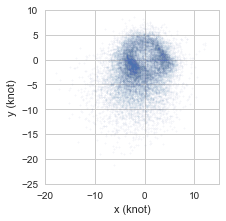

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEZpJREFUeJzt3XtMU+f/B/B3uU1mEZgo7oaCyAwqUC8gYWicU6eIwLwL
85fhEEyW6Ygb6IZTQWVGlxiCTFTQ4TJlKN8t8zLnfkG/0eEF8QLMS1VwTLlfbLkK/fz+IPRnbWl7
oNCKn1fSxD7PU86Hg296es7heURERGCM6c3M2AUw9qLh0DAmEIeGMYE4NIwJxKFhTCAODWMC9avQ
PH36FJs3b4aPjw98fHywfft2tLe3G2w8AMjlcgQGBqKurq7LMRs2bMA777yj8ti8eXOX4+/evYvQ
0FB4enoiICAA586d0/3N6rBixQq1Gvbv39/l+CtXriAkJAQeHh6YP38+bt68qew7ffo01q1b1+1a
7ty5g7Fjx+LixYvKNoVCgdTUVLz//vuQSCRYvHgx8vLylP3P19756EkdBkP9SGJiIs2YMYPy8/Pp
/Pnz5OfnR8nJyQYbT0QUHx9P33//vdYxS5Ysod27d1NFRYXyIZPJNI5tamqiKVOmUFxcHEmlUkpO
TqZx48ZRcXGx7m9YC39/f8rOzlapobGxUePYsrIykkgktGvXLpJKpbRx40by8fGh+vp65Zj58+fT
xYsXBdfR1tZGH374Ibm5uVFubq6yPT09nby9vemPP/6gBw8e0LfffkteXl5UWlpKRKRSd0VFBR09
epTGjBlDN2/eFFyDofWb0DQ3N5OnpyedOXNG2Xbs2DHy9fWl9vb2Ho8n6vhBenl5UV1dndZavL29
6ezZs3rVnZ2dTb6+vtTa2qpsCwsLo8TERL1er4lMJiM3NzeSSqV6jU9KSqLg4GDlc4VCQdOnT6eM
jAyVOsPCwgTXkpKSQqGhoWqhmTt3Lu3Zs0dl7MyZMyk9PV3tazQ0NJC/vz+lpKQI3n5v6DeHZ3//
/Teamprg7e2tbJs4cSKqq6vx8OHDHo8HgCNHjkAikcDW1rbLOiorK1FXVwdnZ2e96r569SokEgks
LS2VbZMmTUJ+fr5er9dEKpXCwsICTk5Oeo3Pz8/HpEmTlM9FIhEmTJigUsO0adOQn5+P27dv613H
3bt3cfDgQWzatEmtLy4uDvPmzVNrl8lkam3p6emwtLREeHi43tvuTf0mNOXl5bC2toaNjY2ybciQ
IQCAsrKyHo8HgJycHPj7+2utQyqVQiQSYe/evZg6dSrmzJmDtLQ0KBQKjeMrKiowdOhQlTYHBweU
l5dr3Y6uGsRiMWJjY/Huu+8iKCgI2dnZXY7XpwZbW1uMGzcOZ8+e1auG9vZ2xMbGYvXq1Rg2bJha
v7e3t0p7Tk4OiouL4evrqzKuubkZBw8eRGRkJKysrPTadm/rN6FpamrCK6+8otLWuZNbW1t7PL69
vR1FRUVwdXXVWsf9+/dhZmYGJycnpKamIjw8HMnJydi3b5+gujXVoK979+6hubkZvr6+2LdvH4KD
gxEXF4fjx4/3qAZXV1cUFBToVcO+ffsgFouxePFinWOlUiliYmIwd+5cTJw4UaXvt99+g5mZGYKC
gvTabl+wMHYBhjJgwAC1H3Lnc2tr6x6Pr6urQ3t7O+zt7ZVtn3zyicoZn+PHj2PZsmUICAiAnZ0d
gI6zQPX19Thw4ABWrlypdx0DBgzQ+H0GBATg0aNHyueaDuPWrl2LqKgo5WHk6NGj8c8//yAjIwMB
AQHdrsHOzg7379/XWNezpFIp0tLSkJWVBZFIpHVsQUEBIiIiMGrUKGzZskWt/8SJE5g9e7ZaqI2p
34Rm2LBhaGxshFwuh1gsBtDx+QIAHB0dezy+84f/7GHWli1b0NzcrHw+dOhQiEQiZWA6ubq6oqqq
Cu3t7TA3N1fpc3R0VG63U2VlpcYaACA1NRVtbW0a+zqZm5urfe4aOXIkcnJyNI7Xt4b29naYmek+
ODl16hRkMpnaZ5aIiAgEBwcrT79fvnwZkZGR8PT0xO7du9VC2tjYiEuXLiEiIkLnNvtSvwnN6NGj
YW1tjby8PEydOhVAx7UHBwcHjR+IhY63t7eHhYUFamtrlW2a/mNv2bIFUqkU6enpyraCggKMGDFC
LTAAIJFIsHPnTrS1tcHCwkJZh0Qi0fh9vvnmm9p2AwDg008/ha2trcpv7sLCQri4uGgcL5FIVAJF
RLh69araB+/a2lrl5z5twsLCEBgYqHze1NSEoKAgJCQkwM/PDwBw69YtrFy5Et7e3khKStL4eaWo
qAhEhPHjx+vcZp8y9uk7Q4qPj6f33nuPrly5QhcuXCA/Pz+Vayq1tbVUW1ur9/jnLViwQO006fNy
c3Np9OjRtGfPHiopKaHs7Gzy8vKiX375hYg6rltUVFRQU1MTERHJ5XLy8/Oj2NhYkkqltHv3bvLw
8KCHDx92ez9kZ2eTu7s7ZWVlUUlJCR04cIDGjBlDly9fJiKilpYWqqiooJaWFiIievz4MXl6etLO
nTtJKpXSpk2baPLkyfTkyROVrxsSEkJpaWlE1HF9qaKigtra2nTWI5fL1U45BwcH08yZM6m0tLTL
61mHDh2imTNndns/9BYRkfH+CO3ZzwOG0NraioMHDyI3NxeWlpaYMmUKlixZojykiI+PB9BxulOf
8c87duwY7t69i5iYGK11XLp0CceOHcPjx49hb2+PwMBATJ8+HUDHYc/q1asRGRmpfIcrLi5GWloa
SkpK4OjoiLCwMHh4ePRoX5w5cwYnT55EVVUVHB0dsXDhQuVp5aKiIiQkJODrr7+Gu7s7gI53wx9+
+AHl5eVwcnLCxx9/rPLO1NjYiMjISGzfvh2vv/46zp49iz179mDXrl06332am5sRHh6u3F5ZWRmi
o6M1jg0ICEBoaCgA4Oeff8bNmze13k3RmyZMmKC5w5iJvXLlijE336Wu6iorKyNPT0+qrKzs44o6
GHN/HT58mJYvX67SFhERQZWVlSb5c+xpTdpe329OOfcFR0dHhISE4MiRI8YupU8REX766SesWrVK
2Xb16lWYmZnBwcHBiJUZB4dGoOjoaJw4cULrDZv9zalTp+Dm5obJkycr2zw8PJCSkmLEqoyn35w9
6ys2NjZdXiTsr2bPno3Zs2ertHWe6XsZ8TsNYwJxaBgTiEPDmEAcGsYE4tAwJhCHhjGBODSMCcSh
YUwgDg1jAnFoGBOIQ8OYQBwaxgTi0DAmEIeGMYE4NIwJ1C//KEKhUKjMGvM8e3t7vaYiYkyTfhma
2tpaHPz1CgaKB6n1Ncif4H/mTcTgwYONUBnrD/plaABgoHgQbAbZ6x7ImEB8jMKYQHq901y/fh07
duxARkYGSkpKEBsbC5FIhFGjRuGbb76BmZkZMjMzcfjwYVhYWGDVqlWYNm1ab9feLQqFAjU1NTrH
MNYVnaHZu3cvfv31V+Wk4Nu2bcOaNWvg4+ODDRs24M8//4SXlxcyMjJw9OhRtLS0YNmyZfDz8zOZ
pRGe1dggw89/VGHwkKEa+xvkT+Dp1G+PWpkB6Dw8c3JyQlJSkvJ5YWGhciGkKVOm4MKFC7hx4wYk
EgmsrKxgY2MDJycn3Lp1q/eq7qFXxTawGWSv8aHp5AFjz9L5K3XWrFkoLS1VPici5Qz6AwcOhEwm
g1wuV1kcaeDAgZDL5XoVYOipaYGOZTHKyp5AJm9S66usqIC5uRXauliPtkFeD9fXBvVKXYbAdemv
t2oSfBzy7PWNhoYGDBo0CGKxGA0NDSrtz4ZImy7ny+2B6upqSGvuaDx7JqJWmFtYYajjGxpfK3ti
DaCxV+rqqby8PK5LTz2tSVvgBJ89c3d3Vy5tfe7cOUycOBEeHh7Iy8tDS0sLZDIZ7t27Bzc3t24X
zJgpE/xOExM

Wall time: 9.46 s


## 2.3 Overview by Month

In [41]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4W+X5/j/akiXZ1vDeI3FiZxBIExLCSgIJYaSFUnb7
hZYuIJT+WqAUCKMUKBQooXRQWgql7Bl2gEISyCAJZHjvLS/J2lvn94cjEeMdHzsO+L4uXbZ0jt5z
JJ37vM/7jPuRCIIgMI1pTOOogPRIn8A0pjGN0WOasNOYxlGEacJOYxpHEaYJO41pHEWYJuw0pnEU
YZqw05jGUYRpwn4DMB25+/pgmrCTgOXLl1NUVMQ999wz6PbW1laKioooKirCarWKeuz333+f9evX
x55v2LCBBQsWiHoMl8vFqaeeyjvvvCPquNMYiGnCThIkEgmbNm0adNu77747Ycf997//TUdHx4SN
73K5+PnPf05bW9uEHWMaX2KasJOEBQsW0NLSQllZ2YBt77zzDkVFRUfgrMaHnTt3cv7551NRUXGk
T+Ubg2nCThJmz55NVlbWgNm0ra2N/fv3s3r16gHv2bRpE+eddx7HHHMMJ598Mg899BChUCi2ffny
5Tz22GOsX7+eRYsWceyxx3LDDTfgcrkAuOyyy9i5cycfffQRRUVFtLS0xN771ltvsWrVKubOncu5
557Lnj17YttaWlooKipiw4YNw36mq666ipkzZ/KPf/zjsL6TaYwd04SdRJx++ukDzOJ3332X+fPn
k5qa2u/15557jquvvpp58+bxyCOPcOmll/LPf/6TG2+8sd9+f/vb33A4HDzwwAP84he/4M033+Qv
f/kLAOvXr6e4uJhjjz2W5557juTkZAC8Xi8PPvgg69at409/+hNer5drrrkmdjNITk7mueee4/zz
zx/28zz99NP86U9/wmg0jut7mcboIT/SJ/BNwurVq3n88cepra2loKAA6DOHzzjjjH77hcNhHnro
Ic4888yYw2jZsmXo9XrWr1/Pj370I2bNmgVAamoqDzzwABKJhGXLlvHxxx/zj3/8g0WLFnHyySej
0+mIi4vjl7/8JU8++STQ5zW+7777OOaYYwAIhUJcc8011NTUMGvWLJRKZWzbcJg5c6Zo3800Rofp
GXYSMXfuXNLS0njvvfcAaG9vZ9++faxatarffnV1dVit1gFm8plnngnArl27+o0pkUhiz5OSkoC+
2dXpdA56HjKZjHnz5sWeZ2RkAAy5/zSmDqYJO4mQSCT9zOJ3332XefPmkZaW1m8/u90OgMlk6ve6
Xq9HqVTG1qgAGo1mwDFkMhnLli3j7rvvHvQ8VCoVUumXP330/0gkcpifbBqThWnCTjJOP/10SktL
aWlp4d133x1gDgMkJiYC0NPT0+91h8NBIBCIbR8ON954I9u2baO3t1ecE5/GlMA0YScZxx57LElJ
STz77LPs3bt3gDkMkJeXh8FgGJCI8NZbb8XGGAk6nY4777yThoaGfp7laRzdmHY6TTKkUimnnXYa
TzzxRGxN+1XIZDKuvvpq7rzzThISElixYgWVlZVs2LCB1atXj9rZs2zZMpKSkvj888/RaDT4/f5R
vS8QCFBWVkZqauoA7/U0jiymZ9gjgNNPP51gMDho7DWKSy+9lLvuuosdO3bw05/+lKeffprLL7+c
+++/f0zHuuOOO/B6vXR3d1NTUzOq93R2dnLBBRfwwgsvjOlY05h4SKY1nb5eaGlp4fvf/z4ffvhh
7LWtW7fywx/+kA8++IDMzMwjeHbTGC+mCTuNaRxFmDaJpzGNowjThJ3GNI4iTBN2GtM4ijAd1vka
IBKJEA6HY8oSgiDE/pdIJP0eMpmsXyrjZOOZZ57h2WefjT1va2vjlFNO4b777ou91tLSEqs60uv1
3HvvvbH0yW86pp1OUxiCIBAMBgkEAgSDwdjD7/fHXguFQmNOKZTJZCgUChQKBUqlEqVSGXuuUChQ
qVTI5RN/L6+vr+eHP/whzzzzDCkpKbHXf/3rX3PMMcdwySWX8NRTT7F3794xh7O+rpieYacIBEEg
EAjg8Xhwu9243W48Hg+RSASpVBp7yOVy5HI5Go2GhIQEVCpVjHRRkkmlUsLhMF988QXHHHMMEokE
QRAIhUIEAgH8fn+M9NFjRokfiUQQBAGFQkFcXFys2icuLk50Et9xxx2sW7euH1mhz2Jwu90A+Hw+
1Gq1qMc9mjFN2COEUCiE0+kcQE65XI5CoUCj0WAymUhISEChUIzrWNHkfplMhkqlQq/XD7mvIAh4
vV7sdjtut5vu7m6CwSCRSKQfibVaLTqd7rDN6127dtHd3c3atWsHbLv22mu58MILeeqppwiFQv1M
6G86pgk7ifD7/fT29mKz2XC73THTNC4ujqSkJBISEpDJZEf0HCUSSWxGPRSBQACbzYbD4aCrq4u2
tjYkEgkJCQkkJiaO+dyfeeYZLr/88kEJf8MNN3DHHXewcuVK3n33Xa6++mpef/31I7r2niqYXsNO
IARBwOPxYLPZ6O3txe/3o1Ao0Ol0JCUlDTvTjReHmsQTcROIRCJYrVZ6enrwer2Ew2G0Wi1GozFm
qg+FYDDISSedxKZNm9DpdP22Wa1WzjjjDHbs2BF77fjjj+ett96aVrZgeoYVHYIgxEzJ3t5eIpEI
KpWKxMREUlJSxm3eThVIpVLMZjNmsxkAt9tNZ2cnFouF5uZmVCoVBoOBpKQklEplv/dWVVWRk5Mz
gKwABoMBlUrFjh07WLx4Mbt37yYuLg6DwTApn2uqY5qwIiEcDmOz2ejo6MDv96NSqUhNTSU5Oblf
sfjXFVqtlry8PKDP9O/o6KCnpweLxUJCQgLJycno9XokEglNTU0DqpR++9vfsnz5clasWMEjjzzC
nXfeic/nQ6vV8vDDD0+bwwcxbRKPEz6fj87OTrq7u5FKpSQmJpKRkXHEZ9KJNolHC5fLRWtrK263
G7lcTkpKCiaTaVLCRl9HTH9rhwFBEOjt7aWjowO3241arSYnJwej0Tg9E3wFOp2OoqIiwuEw7e3t
WCwWWltbMRqNJCcnD3BuTWN4TM+wY4AgCFitVlpbWwmHw+h0OrKysqZknHCqzLCDwWaz0dbWhs/n
Q6fTkZmZiVarPdKndVRgeoYdBQRBwOFw0NzcTDAYxGAwkJWVNeWIcLTAYDBgMBjwer00NjZSUVER
W0pMxZvfVMI0YUeAy+WiubkZr9dLYmIiOTk500QVCRqNhlmzZuH1eqmvr6e0tBSTyUR6evoAz/I0
+jBN2CHg9XppaWnB6XSi1+uZO3fuEXckfV2h0WgoLi7G5XLR0NDAgQMHSE5OJjU1ddo59RVMfxtf
QSgUorm5GavVSlxcHLNnzx6g/TuNiYFOp2POnDlYrVZaWlro6uoiLS2NlJSUaWfeQUwT9hDYbDYa
GxuRSqXMmDGD+Pj4I31K30gYjUaMRiNtbW20t7djtVrJz8+fXt8yTVigb1ZtbGzEbreTlJRERkbG
NyLZYaojPT2d5ORkampqKCsrIz09/Rs/237jCWuz2WhoaEChUEybvyLiww8/5JFHHsHj8bBs2TJu
vvnmftu3bdvGvffeSzgcJiMjg3vvvZeEhIQB48jlcmbNmkV3d3dsqfJNnm2/sdNIKBSitraW+vp6
kpOTKSkpmSarSGhubmb9+vU8+uijbNy4kbKyMj766KPY9nA4zA033MAf//hHNm7cSGFhIY8//viw
Y5rNZubNm4dMJqOsrAyLxcI3MYVgyhA22kT4448/7vf68uXL+zUiDgaDLFiwAKvVGnvtsssu47zz
zos9t9vtLFiwgEAgMOixbDYbBw4cwOPxMHv2bDIyMo5qM0sQBCKRCIFAAJ/PF3sAsf+jNa2TgU2b
NrFmzRpSU1N

Wall time: 19.8 s


In [42]:
df.describe()

lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.824993     -1.857789      4.981339   
std    4.703954e-12  9.172000e-11      3.502935      4.019249      2.782402   
min    4.700000e+01  2.370000e+02    -17.817464    -21.224037      0.019720   
25%    4.700000e+01  2.370000e+02     -3.219526     -4.177964      3.175466   
50%    4.700000e+01  2.370000e+02     -1.137571     -1.442500      4.308202   
75%    4.700000e+01  2.370000e+02      1.910974      0.955862      6.058296   
max    4.700000e+01  2.370000e+02     12.199321      8.616677     22.134794   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     200.814362  2.010567e+07    900.000000    190.187829  
std       93.742468  2.872210e+04    670.843355     86.668069  
min        0.002977  2.006010e+07      0.000000      0.002385  
25%      141.233901  2.008070e+07    450.000000    125.253343  
50%      218.459009  2.010567e+07    900.000000    201.846276  
75%      266.495076  2.013070e+07   1350.000000    249.810863  
max      359.992136  2.015123e+07   1800.000000    359.994014

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

[-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11]


# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1.1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

0.7
Wall time: 1 ms


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [48]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 529
[ 0.00010868  0.00014313  0.00017183  0.00020656  0.0002529 ]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLHd1Lvhl7dVV1Wv1vldfiREyArQaIwiHjEKMbAyG
CWP83oTl4E04HA4ERs8hhCRggGsESNe8Z3k0IAMiJMK6PMUwWIHCDrOHcYCEL2KetQW3u293V9fS
tXTte2bOH62T91fZmVW5VXVVK78IxdW93Zn5q6rMr87vnO98hxNFUYQNGzZsnFI4TnoBNmzYsNFL
2CRnw4aNUw2b5GzYsHGqYZOcDRs2TjVskrNhw8aphk1yNmzYONWwSc6GDRunGjbJ2bBh41TDJjkb
NmycatgkZ8OGjVMNm+Rs2LBxqmGTnA0bNk41bJKzYcPGqYZNcjZs2DjVsEnOhg0bpxo2ydmwYeNU
wyY5GzZsnGrYJGfDho1TDZvkbNiwcaphk5wNGzZONWySs2HDxqmGTXI2bNg41bBJzoYNG6caNsnZ
sGHjVMMmORs2bJxquE56ATZOHqIootFooNVqwel0wu12w+FwgOO4k16aDRumwYmiKJ70ImycHOr1
OvL5PEKhEJrNJgAgFothYmICoVAIDofDJj0bQw07knsNg+d5VKtVpFIpBAIBtFotuN1uiKIIURTB
8zxarRYajQY4joPT6bRJz8bQwSa51yBEUUSr1QLP8+A4DjzPY3NzEzzPw+VyQRAEVCoVeL1euFyX
bxEivXq9DofDAafTCafTCZfLZZOejYGFvV19jUEQBDSbTdDHHo/Hkc1msbKyAo/Hg0ajgUQiAY7j
0Gw24XK5MDIyAr/fj5GRETidzrbz0Xk4jpPIzuVyHfs9GzZOCnYk9xoBbT95ngcAtFotRKNRCIIA
t9uNUCiERqMBn88Ht9uNsbExBAIB1Ot1VCoV5PN5JJNJifSI+Fgya7VaEEUR9XrdJj0bAwOb5F4D
EAQBrVYLgiCA4zgUi0Xs7+9jcnISo6Oj2N3dbft9juMgiiI4joPP54PP58Pk5CREUUStVkO1WkUu
l0MikYDb7ZYIrxPpORxHaqVms4nR0VGb9Gz0DTbJnXJQHo2KCYlEAoVCAcvLy1KkpjVjwXGcRGYs
6VUqFeRyOcTjcXg8nrbtLZGbKIqoVqs4ODiQChj0px3p2eglbJI7pZBvTxuNBvb29uDxeLCxsSEV
FMwUC1jSA44iRor0Dg8PEY/H4fV6JcKjYyhSlEd6NunZ6AVskjuFkG9PDw8PkUgkMDMzg8nJyWPE
Jo/kiIT0wuFwSPm6qakpifQqlQqy2SxqtRoAIJ1OS+TIRno26dnoBWySO2Vgt6eCICAej6NarWJ9
fR0+n+/Y7/dS9sGSHgCUy2UcHBwAADKZDOr1Onw+nxTp+Xw+m/RsWA6b5E4JRFFEMpnEyMgIvF4v
arUa9vb2EAgEsLGxIZGH2rFAbwkPOCI9h8OBcDgM4CjirFarqFQqSKfTEulRTk8r6Xk8HlujZ0MV
NsmdApD27fDwEC6XC8ViEalUCgsLCxgbG+t4rBI5GN2udoP8Wg6HA4FAAIFAAMDlDgzqwmg0GtK2
liI9Ooec9BqNBniex8TEBNxut016NiTYJDfkoM4FAm0HNzY24PF4NJ1jUPTgTqcTwWAQwWAQwGXS
q1QqODg4QLPZPBbpEZlRwcPv96NWq7V1ZNik99qGTXJDCnlrVqlUQrVaRSgUwvLysuaHWu33BoH4
OpFeMplEq9WSSI+IXh7pNZtNm/Re47BJbgjBFhcAIJlM4vDwED6fD+Pj46Yf4EElADnptVotifRK
pZIkmaFIz+v12qRnwya5YYJc+9ZsNhGNRsFxHDY2NhCLxXSfs1f5t37A5XIhFAohFArB6/WiWq0i
GAxK4mSe56V83sjISFuBgiU9KmQQ8dmkd7pgk9yQQK59KxQK2N/fRzgcRjgcbhPZWoFhJD6HwyGR
HnAU6VUqFakNjY3y5KQnCIJUwGFJz+VyweVy2aQ3xLBJbgjA87xkaCmKIuLxOIrFIlZXVyUNGmAs
KmP7VNl/GzYovW6Xy4XR0VGMjo4COIp8aXuby+UgCEJbpMdGcCzpNZtNFItFzM7O2qQ3hLBJboAh
Ly6Q9s3n8+HMmTO2IFaGbsTjdrvhdrvbSI8ivWw2C1EU2yI9Ij2KCGl7y3GcHekNEWySG1Cw21MA
yGazSCaTmJ2dxcTEhGX6NjpPoVBAPp+H3++XmvlPO8hSamxsDKIotkV62WwWAOD3+yUjUTbiZSM9
m/QGGzbJDSAODw/hdDrh9XohCAJisRhqtZpqaxbBCMkRicbjcYyNjaFUKqFcLsPhcKDZbEpbudMe
NXIcB4/HA4/H00Z6lUoFxWIR9Xod29vbipEeYJPeIMMmuQECbU/T6TRGR0fB8zz29vYQCoW6tmYZ
ATmTAEAkEpEIkgTFbrcbhUIByWQSbrdberjlvnGDAKsjT5b03G43stksZmdnUalUUC6XkU6n4XA4
2t4TNdID0DYfw+l02qTXR9gkNyBgtW9UPS2Xy5paswh6Ijmqzk5PT6NarcLpdKLVagGANK9hYmIC
ExMTbb5xrIUSRXlsj+lJolfEIYqi1CPr8XgwPj4ujXEkjR755LGFDDaCs0nv5GCT3AlDrn3jeV7a
LuppzQK0kZwgCEgmkygUClJ19uDgoONxrG+c3EJJ3lgv7zE9reA4Dl6vF16vV/oiINIrFosS6bFW
8Wqkl0qlMD4+jkAgIDmsnPb3r5+wSe4EoWZL7nK5MD4+rovgtIC2py6Xy1R1Vm6hRNO9yPmX7TEl
V5RhfmjlEhslKJFevV5HtVqVtvwul6tte0ukV6vVpMpto9EAgGPzMYb5/Ttp2CR3QpC3ZiUSCeRy
OSwtLaFQKBi6qTtFcvl8HrFYDNPT05iamjqmi6MHmf1TKxwOx7Ee00qlgkqlgkQigVarJSXq5VXK
YYCRfB87H4MlPaWhQGwVnd4Xiu7lM29t0tMPm+T6DLn2rdlstkVXZJVk9MGSHycIAhKJhKJ4uFdw
Op2KnQfFYhHNZhNbW1tSlEfkZxa9Jk4r+oHVhgLxPC/Nx5AXd2zSMw+b5PoI+fZULboy057FHlev
16W5Dt22p73UxVHngdfrRbPZxOLiohTppdNpcBzXRnrsQOtBQC8IlM1zFgoFzM3NQRRF1aFANukZ
x2DdTacYrO+bKIqIxWIol8tYW1uTBsEQjJIcexwRqNpcB/lx8r/T9qkXkItw5VVKNnf1WtDosdVb
rUOBaD6GTXrdYZNcj6HWmuX3+7GxsaH4AJshOZ7nEYvFUCwWFQm00zpP4kFQS9izuSua7co+3Err
7xV6/d4onV/LUCCS8bBDgVjSa7VaaDQaiMViWFxchNvtfk2Snk1yPQTbWA8cDW85ODjA3NwcJiYm
VI8zGknxPI9cLodAIKCrejpIN7xa7krp4ZZr9AbpdeiBFhJVqmjT+9JtKBDl/ShqZiM9t9vdRo6n
ETbJ9QCkfXvhhRdw5swZAEAsFkOj0UAkEoHX6+14vJFILp/PI5PJYGRkRJczMLtmK3KCVkNJo0dz
IEijR/22bre7J1HXSURy3aBEekpDgfx+/7HKLdAe6Z120rNJzmLIG+vL5TISiQRGR0extLSkqTNA
D8lQ9bRUKkkkoPcGHaYbWm34TSaTQblcxubmpqpR5mmG/H1hSQ8Atra2Ogq2lUjP6XRKer1hfg9t
krMQcu0bNdcvLi5K9j5aoYXk2OrpxsYG8vk8qtWqobXLrzcokVw3kCV6rVYDx3EYGxtr84wjo0wl
zzitGMRIrhuI9Px+P3K5HCKRiBQBHxwcdJyEBly+l+VW8cNIejbJWQDanrZaLcl/LBqNQhRFrKys
SCJZrdASyZH

## 4.1 Bootstrap GOF limit

In [50]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 8.27 s


In [51]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAADXCAYAAADWZd6QAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF/tJREFUeJzt3X1Uk+f9BvCLF2MJoUEUOG0RWlPbcqQ6cLNlqyJZfWFQ
TY3KW8FOzuZcsSvDAToOQisCsxu1zjdqHR6nVWQ9rdae9Vih2tNxGOC0A6wcA8tEV6tQ1ASPvD2/
P/yRNVMJ5k4gidfnL5L7yc33zg0XeXnyxU2SJAlERALcR7sAInJ+DBIiEsYgISJhDBIiEsYgISJh
DBIiEuY52gXQ8KjValy4cMHsOrlcjqeeegpZWVkIDw8fpcqIADeeR+Ic1Go14uPjsWjRIgCAJEn4
+uuv8Yc//AFnzpzBsWPHoFAoRrlKul/xqY0T8fb2hr+/P/z9/REQEICpU6eiuLgYXV1dqK2tHe3y
6D7GIHFyMpkMAODh4WHx2HPnziElJQXh4eF49tln8dvf/hbd3d2m8V27dmHWrFmIiIjAhg0bkJ6e
js2bNwMAcnJy8Oqrr5rNp1ar8ec//xkA0NfXh9LSUqjVakyZMgU//OEPUVhYiP7+ftPtV69ejSVL
lmDGjBn429/+ht7eXrz55pv40Y9+hOnTpyMtLQ2tra02uV9oZDFInFhnZycKCwvh7++P73//+xaP
z8zMxMMPP4wPP/wQO3bsQE1NDcrKygAABw8exObNm5GdnY0DBw7g4sWLOH78+LBr2blzJz788EMU
Fxfjk08+QVZWFvbu3YuqqirTMR999BGSk5Oxe/duhIeH4+2338aJEyfw1ltvoaKiAo899hhSUlJw
/fr1e78zaFQxSJxIcXExwsPDER4ejmnTpmHWrFno6OjAn/70p2G9PtLe3g5fX188/PDDmDZtGrZt
24YFCxYAAN577z0kJCQgNjYWkydPRnFxMby8vIZd2+OPP46ioiLMmDEDQUFB0Gg0UKlUaGlpMR3z
2GOPQaPRIDQ0FG5ubigvL0d+fj5+8IMfQKVSITc3FwqFAocOHbr3O4dGFd+1cSIrVqzAggUL0NPT
g3379uHo0aNIT0/H5MmTh3X7VatWoaSkBO+//z6ee+45zJkzBzExMQAAnU6H5cuXm45VKBR48skn
h13b888/j7///e/YuHEj2tra0NLSgvPnz2Pu3LmmYyZOnGj6+t///jd6enqwfPlyuLm5ma6/efMm
n944IQaJExk3bhxCQkIAAOvWrUNnZydWrlyJQ4cO4aGHHrJ4+5dffhnz58/HsWPH8PnnnyMrKwuf
f/45ioqK8MADD2BgYMDs+MHXXwCY/bIP6uvrM339xz/+Ebt374ZWq8XcuXORmZmJzMxMs+MfeOAB
09eDr53s2rUL48ePNzuO7z45Hz61cWLr1q2Dh4cH8vPzLR578+ZNFBYWore3F8nJydi+fTvy8vJw
5MgRAMATTzyB06dPm47v6enB2bNnTZfHjBkDo9Foumw0GtHZ2Wm6/O677yI7Oxs5OTnQaDQICgrC
xYsXcbezC4KDg+Hp6YnOzk6EhIQgJCQEEydOxKZNm8zqIOfAIHFifn5+yMzMxGeffYZPP/10yGPH
jh2LkydP4vXXX0dLSwt0Oh2OHj2KqVOnAgB+/vOfo6KiApWVlWhtbUVBQQEuX75suv3TTz+N+vp6
HD9+HK2trcjNzYW7+39/fAIDA3H8+HHo9Xo0NTXhV7/6Fa5evYqenp471uPt7Y3ExEQUFhaabpef
n4/q6uphP1Ujx8EgcXKLFy9GeHg4NmzYgBs3bgx57FtvvQV3d3ckJSVh8eLFkMlkePPNNwEAM2fO
RF5eHrZs2YJFixbBy8sLoaGhptsuXLgQcXFxyMjIQHJyMkJDQxEREWEaLy4uRnt7O1544QW88sor
CAoKwuLFi9HU1HTXerKysjBv3jysXbsWCxYsQEtLC3bu3Gn2Wgo5B57ZSne1aNEiREdHY9WqVaNd
Cjk4vtjqIjo7O00vYN6JXC6Ht7f3CFZE9xMGiYtISkpCW1vbXcd/9rOfYfXq1SNYEd1P+NSGiITx
xVYiEsYgISJhDBIiEjasIOno6EBUVBR0Op3Z9VVVVdBqtYiPj0dFRYVdCiQix2fxXZve3l7k5eWZ
fU5i8PqioiJUVlbCy8sLiYmJUKvVmDBhgt2KJSLHZPERSUlJCRISEhAQEGB2vU6nQ3BwMJRKJWQy
GaZPn466ujq7FUpEjmvIIHn//ffh5+eHmTNn3jZmMBjg4+Njuuzt7Q2DwWD7ConI4Q351OYvf/kL
3NzcUFNTgzNnziA7Oxvbtm2Dv78/FArFbZ8G/W6w3E1DQ4N41URklenTp9tl3iGDZO/evaavU1JS
kJ+fD39/fwCASqWCXq9HV1cX5HI56uvrkZaWNqxvaq/FOIKGhgau7x61tLRgRfGnUIx7RGgew7cX
sCPneTzxxBNWz+HK+2fPP+L3fIr84cOH0d3djfj4eOTk5CAtLQ2SJEGr1SIwMNAeNRKRgxt2kOzZ
swfArUcig9RqNdRqte2rIiKnwhPSiEgYg4SIhDFIiEgYg4SIhDFIiEgYg4SIhDFIiEgYg4SIhDFI
iEgYg4SIhDFIiEgYg4SIhDFIiEiYxU//9vf3Izc3F21tbXBzc0NBQYFZv4fy8nIcPHgQfn5+AICC
ggJMmjTJfhUTkcOxGCTV1dUAgP3796O2thalpaXYtm2babyxsRElJSUICwuzX5VE5NAsBsnzzz+P
2bNnAwAuXryIBx980Gy8qakJZWVluHz5MmbPno0VK1bYpVAiclzDamzk6emJ7OxsHD16FG+//bbZ
WGxsLJKSkqBQKJCeno7q6mpER0cPOZ+r923l+u6NXq+32VyNjY24fv260Byuvn/2MOwOaSUlJVi9
ejWWLl2KI0eOQC6XQ5IkLFu2zNT0OSoqCs3NzRaDxFV7YgKu3fMTsM/6fHx8gI++tslcYWFh7Nl6
F/YMSIvv2nzwwQfYsWMHAMDLywtubm5wd791M4PBgLi4OBiNRkiShNraWr5WQnQfsviIZO7cuViz
Zg2Sk5PR19eHtWvX4ujRo6YG0BkZGUhNTYVMJkNkZCSioqJGom4iciAWg0Qul2PTpk13HddoNNBo
NDYtioicC09IIyJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJh
DBIiEmYxSPr7+7FmzRokJCQgMTERLS0tZuNVVVXQarWIj49HRUWF3QolIsdlMUi+27P1tddeQ2lp
qWmst7cXRUVF2LVrF/bs2YMDBw7gypUr9quWiBySUM9WnU6H4OBgKJVKALc6n9XV1SEmJsY+1d6D
/v5+6HQ6m8ylUqng4eFhk7lcia3u47a2NhtUQ6NJqGerwWAwtVkEAG9vbxgMBovzjURPTL1ej5K9
X0KuDBCap/vqN8hOnoqQkJBh38bVe34Ors9W93FH+xmMDwq1RWns2TpKhHq2KhQKGI1G0zFGo9Es
WO5mJHpi+vj4QK78GopxjwjPdS99QF255ydgvj5b3cfdVy/ZojQA7Nk6FIft2apSqaDX69HV1YWe
nh7U19cjPDzcbsUSkWMS7tmak5ODtLQ0SJIErVaLwMDAkaibiByIcM9WtVoNtVpt06KIyLnwhDQi
EsYgISJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJhDBIiEsYgISJhQ35or7e3
F2vXrsWFCxfQ09ODlStX4sc//rFpvLy8HAcPHoSfnx8AoKCgAJMmTbJvxUTkcIYMkkOHDsHX1xcb
N25EV1cXNBqNWZA0NjaipKQEYWFhdi+UiBzXkEEyf/58zJs3DwAgSdJtfUubmppQVlaGy5cvY/bs
2VixYoX9KiU

## 4.2 Bivariate Empirical Limit

In [52]:
%%time
gofs_mean_set_bivar = []
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_bivar_set={}

for year_length in [5, 7, 10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=year_length)
        gofs_bivar.plot(y='K_S', ax=ax2, label=year_length)
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='start year')
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXdclWX/x9/nwDnsjbjYoKgIIpiKW9PcKc7cms3HrKxM
e54nm7/yaViPNjXL0idLzZzlRMOJynCwlClTQIZszrh+f5CkgXBAtvf79eqV3Pd93df1hfM51/pe
369MCCGQkJBo8cibuwESEhK6IYlVQqKVIIlVQqKVIIlVQqKVIIlVQqKVIIlVQqKV0GxivXjxIvPm
zatyPTAwkKlTpzJz5ky2bdsGgFarZdWqVcycOZN58+aRlJTU1M2VkGh29Juj0g0bNrBnzx6MjIzu
uq5SqXj//ffZsWMHRkZGzJo1ixEjRhAaGkp5eTk///wz4eHhrF69mi+//LI5mi4h0Ww0S8/q6OjI
unXrqlyPi4vD0dERCwsLlEolfn5+nD9/npCQEAYPHgyAj48PV65caeomS0g0O83Ss44ePZqUlJQq
1wsLCzEzM6v82cTEhMLCQgoLCzE1Na28rqenh1qtRl//3s0PCQlp2EZLSDQwfn5+dXq+WcR6L0xN
TSkqKqr8uaioCDMzsyrXtVptjUK9TXW/jJCQkDr/kloykj26obp1i/T9v5O+/3fUBQXIFArMPLpi
3qM7Fp49MPPoit7fpmU1EZp2hU1h28gozMLcwJQ53gEMdemPXFZ1sHrbptSsQpZ8EIitpRHPjrGu
sw0tSqxubm4kJSWRl5eHsbExFy5cYPHixchkMo4dO8a4ceMIDw+na9euzd1UiRaM0GhQFRSgysuj
PDeP3Ash3Dh8FG1ZGfpmpjg8NoOO48eiMDev+7uFYP2FHzkafxK5TM64LsOZ3nMCJkrjWst+tzcC
jVbw+ERPUKXXue4WIda9e/dSXFzMzJkzWblyJYsXL0YIwdSpU2nfvj2jRo3i1KlTPPbYYwgheO+9
95q7yRItANWtWxQlJlGcdL3iv+vXKc3MRJV/C7Tau55V2trSed5s2o8aiZ6hYb3r/CXyN47Gn8TF
0oEl/RbgaNlZp3LhVzMJjsigp5sN/l4dCQ1tRWK1t7ev3JqZOHFi5fURI0YwYsSIu56Vy+W8/fbb
Tdo+iZaJKj+fjIOHuXH4KGWZmXfdk+npYdDOFkOPrigtLVFYWaK0ssKoc2es+z2EXIepU02cTDrH
tiv7aGdiw2tDn8PSULeeWasVbNoTgUwGix/tiUwmq1f9LaJnlZCojcK4eNL37SfrxCmESoXc0BCr
h/wwdnTExMkJYydHjDp3Qq5QNEr90VlxfHFuM0YKQ1YO/ofOQgUIjS8iMf0Wo/o64m5vWe82SGKV
aLEIIci9EELKL79SEBUNgGGnjnQcPw67EcPQN659ntgQ3CjM4sNTX6EVWl4a8CQOFp10LltUoiLw
4i2MDPSYO7b7fbVDEqtEi0MIQc658yT/vJ2iuHgArPx603HCeCx9eiGTN517QGF5EauDvqCgrJAn
/WbTq0OPOpXfduQqxWVa5o/rjrV5/efKIIlVohkoTk4h4ZtvKU5JxahzJ4zt7TFy6IyxgwOayCgu
bv6RooREkMmwHTQQ+xnTMHFybPJ2ZhRk8vm5H0gtyGCCx0hGuQ+uU/m0rEL2nIjDwkSPSUPc7rs9
klglmgxteTnJ238hdecuhFqNwsKC/IuXyL946a7nVHI5tkMG4zBjGsYO9k3ezlJVKTujDrAv5ihq
rRp/Bz/megfU6R0areDTn8JQawSje1ugVOjdd7sksUo0CXmXLhP35deUpqWjtLHB9eknsOnXF3Vx
CSWpqZQkp1CckkJGSire8+dibK/blkhDIoTg1PULbLm4k5ySPGyMrJjnMxV/B986r+Du/iOOqMQc
BvXqRA/Hhhm2S2KVaFRKMzK4vnUbWcf/ALmcjhPH4zh7FvrGFd5C+sZGmHVxx6yLOwA3Q0IaVaha
oSU4JYyTSedRazXAX/ECc0vyScxLQSHXZ0qPsUzuPhpDfYM613E94xZbDkRhaWrAM1O8iY1pGF92
SawSjUJpRgbJ238hM/A4aLWYuLjgtuSZSlE2NEII4nKSKNOU08XaGaW+ssr9C2mX2HZ5L0n5qfd8
T5/OvVjgM5X2pu3q1Q6NRssnP4WhUmtZMr0XFqZ1F/u9kMQq0aCUpGeQsv0XMo8dB60WI3t7HGZO
x3agPzK9+5+3/R2t0HIh9RJ7og9z9WbFyrFCrk9XW1c87TzoadeVYlUp26/sIy43CRkyBjv1ZUqP
sdgYW1W+R4YMmUyGUu/+9ml3BF4jNjmP4X729O/Z8b7e9XcksUrUG6HRUJycQsHVqxREX6UgJoaS
lIpeq7FFWq5REZQYzN6Yw6QXVHgy+XXyooOpHRGZMURmXiMi8yrb7ijj7+DH9J7jsTdvWBHdJj41
n58Ox2BjYchTk70a/P2SWCXqjOpWASk7fuHG4aNoiosrr8sNDbHw9qL9qJENItJSdRk7I3/n92vH
UWlUyACZTI5MJkMrtGi0GvTkegx3GcBEj5HYW/wlwoKyQiKzrhFx4yplmnLGdR2Ok2XjrSyr1Fo+
2RqKWiNYOsMHU2Nl7YXqiCRWCZ3RlJWRvv93Unb8gqaoGKWNNTb9+2HWrStmHl0xdnBokF5UCEFw
Shjfh+/gZnEuVkYW2FnaI4RACC0CEAg87TwY13U41kZVXfjMDEzpZ9+bfva977s9urDl9ygS028x
ur8Tft3aN0odklglKhFCkH3iFCVpaSj/dIJXWFmhtLYi/+Jlkv63lfLsbPRNTXF+fCEdx42pty9u
ZOZV4nOvY2tsjZ2JDXYmtpgojckpz+e9oM+4mBGJvlyfKT3GENB9LAb6Dd9TNRTBV9LZeTyWjrYm
FcffGglJrBKVpOzYyfUtP97zvkyhoPOUydhPDUD/jsgddUEIwa9RB/jp8p4q94z0DSlTl6NFS68O
3VnkO5NOZo3TSzUUN3KK+eSnMJT6cl5b8BDGho1zkAAksUr8Sdq+37i+5UcM7Nrh+tQTqAsLKc/N
ozwnF1VuLvpmpnSeMhlDO7t7viPlVjrh6RF0b9cFN2unKvfLNSq+Or+Fk0nnsDG24rGej1JQXkRW
0U0yi7LJKsqhpKSYeX2m0c++d72PkjUVKrWG1T+cp6hExdIZPrh0smjU+iSxSnDjaCAJGzaisLLE
8+03MOqo+2qpWqPmXGo4h2KDiMy6Vnnd064rj3YbhU8HT2QyGXkl+Xx48iuu5STSxcaF5QOfxtKo
6oc7JCQEPwffBrGrsfl2TwSxyXmM6OPAqL6N77ssifUBJ/vUGWI/+xJ9M1M839JdqIVlReyJOcyx
+NPklxUA0NPOg/4OvTmXcpFLN6KIyLyKg3lHhrsOZP/Vo9wszmWwU1+efmjufe9nNjcnwlLZdyoB
pw5mPDvVu0lGAZJYH2ByQ0K5uuZT9AwM6PHG6zqfbMkoyOS9oM/IKMzCRGnM+K4PM8ptEJ3MOwDw
iPtQEnNT2BtzmNPXL/BD+A5kyJjtPZlJ3R5p8cPb2kjJLGDd9jCMDPRYMf8hDJVNIyNJrA8oxckp
RK/+EJlcTvfXX9PZDTAmO44PTnxJQXkRk7uPZlqPcVVc+wCcrexZ2n8Rs7wnERh/ii42LvTu2LOh
zWhySsvUrP7+PCVlGpbP9cOhvVnthRoISawPKInfbUJbXo7Hqy9j4anbdsPZ5FDWnf0OjdDyVJ85
jHQbVGsZW2NrZvScWOtzdSW/sIz8wjLK1VrUai2qP/9zaG9GOyvdQ4rWBSEEn/9ykaSMAsYNcGZI
76Y9vieJ9QEkNzSM3JAwLLy9sBngX+vzQgj2xRxly8WdGOgrWT7gGXw6Nt5+Yk0UlajYeiiGfSfj
0WhFlfv6enJ

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)    0.055724  0.023831  1.390425e-07    0.025830     0.203014   
(1997, 2002)    0.038768  0.015876  9.186261e-08    0.020559     0.164481   
(1991, 1996)    0.301746  0.026755  1.203470e-07    0.022697     0.186056   

              R_square  
year_lim                
(2001, 2006)  0.983403  
(1997, 2002)  0.988895  
(1991, 1996)  0.985451

Wall time: 27.9 s


## 4.3 Univariate GOF Limit

In [53]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x, density_dir):
    df_previous = df_all_years[str(start_year):str(end_year)]
    _, _, density_expected, y_ecdf_previous, density_dir_expected = empirical_marginal_distribution(df_previous, x)
    
    # 1. Speed
    r_square = sector_r_square(density, density_expected)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    
    # 2. Direction
    r_square_dir = sector_r_square(density_dir, density_dir_expected)
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s, 'r_square_dir': r_square_dir}

In [54]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
gofs_mean_set = []
gofs_univar_set={}

for year_length in [5, 7, 10]:
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    if len(gofs)>0:
        gofs = pd.DataFrame(gofs).set_index(['year'])  
        gofs_univar_set[year_length]=gofs
        ax1.plot(gofs.r_square, label=year_length)
        ax2.plot(gofs.k_s, label=year_length)
        ax3.plot(gofs.r_square_dir, label=year_length)
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
plt.tight_layout()


plt_configure(ax=ax1, ylabel='$\ R^2$', tight='xtight', legend=True)
plt_configure(ax=ax2, ylabel='K-S', tight='xtight', legend=True)
plt_configure(ax=ax3, ylabel='$\ R^2$', tight='xtight', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAACpCAYAAADUU/oBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlA1VXaxz/3XuCyw2UVZEdABVGWVCSXGg2zzNwTX820
spk2GyurqaysdOadmspKq8lsdMzMyjdbrBSRcmdVVtll3/f1Lr/3jysoAXJBQMTf5y/5LWe59349
zznnOc8jEQRBQEREZMggvd4NEBER6YgoShGRIYYoShGRIYYoShGRIYYoShGRIYYoShGRIcZ1E2VC
QgIrVqzodD0iIoKFCxeydOlS9u3bB4BGo+Hll19m6dKlrFixgtzcXAByc3NZtmwZ4eHhbNy4EY1G
M6h9EBEZCK6LKD/55BNefPFFWlpaOlxXKpVs3ryZHTt2sGvXLr788kvKy8s5fPgwra2tfPnll6xf
v54tW7YAsHnzZtatW8eePXsQBIEjR45cj+6IiPQr10WULi4ubN26tdP1zMxMXFxcsLCwwMDAgKCg
IM6ePUtMTAxTp04FYMKECSQmJgKQlJTExIkTAZg2bRonTpwYvE6IiAwQetej0rCwMPLz8ztdr6+v
x8zMrP1vExMT6uvrqa+vx9TUtP26TCZDpVIhCAISiaT92bq6uh7rjomJ6YceiIjoTlBQUK+evy6i
7A5TU1MaGhra/25oaMDMzKzTdY1Gg56eHlKptMOz5ubmOtXzxw8pJiam1x/cUGM496GpqJjq2Fiq
YmKpz8jSXpRIQCJBIpWgZ2qKxTg/LAMmYOHni8zQEEGjofL0WfK+2k9DpvYdc9+xmI8Zjam3F2be
XhgoFDq161ReLP9N+JaShnKM9Y2YP2Y2d3rfhoFMv9v2n00u5rVPT/NKuFOvP4chJUpPT09yc3Op
rq7G2NiY6Oho1qxZg0Qi4ejRo8yZM4f4+Hi8vb0BGDt2LKdPn2bSpElERUUxefLk69wDkf6itbqG
gq+/oTI6lubCwvbrcns7pPr6IAgIggAagebiEhpzL1L0/Y9I9PQwHzMaZW0tjbkXQSLBOnQKzksW
YuLm1ut2RGSdYPvZXcikMuZ43cYC3zmYy017fO/nU7m9rquNISHKgwcP0tjYyNKlS3nuuedYs2YN
giCwcOFC7O3tmTVrFsePH+e+++5DEATefPNNADZs2MBLL73E22+/jYeHB2FhYde5JyL9QVNREcmv
bKK5uASpoSFWk25BERSIIjAQua1Np+c1SiV1qWlUxydQFRdPzflEkEqxnTEdp8ULMHbq/WgFkFdT
yI7YvZjoG7Fp5jM4mTvo9F5FTRNnk4sZ5WzZp3olN9spka5MpOFs+t1IxMTE4G1uQcqmN1DW1OK0
eCHOSxdrR8ZeoKypQRAEDCy1oqhsqia1LAMbYyu8bTx0KqNF1coLv24hr7aIp0PXMtFpgk7tDwoK
Yu+vafz3UCqPLR6PjX7FjT2nFBn+VJw8Rd5XXyO3scbuthkogoPaRafOyCLxmwNoWlvxeORhHO7s
m+XTJJcSX5xM8oULJJelU1xfBoBMKuPp0LUEOY7rsYzP4vaRV1vE7FEzdBJkG2qNwC+nczGSy5g6
YSQpSRW9br8oSpFBoaWigqyP/k3l6TMgldKQmUXl6bPomZpiMzUUuZ0dyr37kMhkjH72aaxDJnVZ
jlojIJNKOl3XCBqSSy/wa+bvnCmIR61RA2Ckb0iAgx/uCmd+SDvCW8c/5tlb/8wEh7HdtvX33LNE
ZB3H3dKZ/5mwoFf9jEsrpayqibDJrhgb9m6Eb0MUpUi/oW5pQdPcjMzEBKme9qclaDQU//wruf/Z
jbqxEXPfsXj+5REEpZLSyGOUHYui+KeftQUYGuK38UXMx47pVHZFYxWfHI4kOjsLfw97gn1GYqxv
iJG+ISX1ZRzO/L19RHQyd2C622TG2fvgZumMVColv7SOEXIXPjm3g/89vp3npv6FcfajO9VTXFfK
x9H/xVBPzropD3ZaYe2JQydzAJg92a1X712JKEqRa0bV0EDhwR8o/O4g6oZGAKSGhuiZGCORSmkp
K0dmYozno49gP/NPSC5tZbm7u+G28n+oTjhHdVw85SMd2wWp0qg5cTGaxNI0UkrTKWko15Y7AhIb
M0iM69gGfZk+09wmMdNjKj42Hu371wC/xRfw9p4YjOT6PPnQg7x7+hP+8ds2Xpj+GGNsvRAEgZKG
chJL0vjxQgTNqhYen/QADmZ2vfocahvVnE0pwdPJos+LPCCKUuQaUDU2UfTDjxQe+A5VfT165uZY
TZ6EurERVUMDqvp61I2NWIeG4L5mNXJrq05lSGQyFIEBKAIDqLzk2KHWqHnnxL85UxAPgFxmiKba
DlmTDfffHsLvCXkk5ZZiINcw2d+G8Z4jmOwciKncpFP5P57IZvs35xAEqGtsJS/DiPWhD/PP4x+x
OeoDJjpNIKU0nbLGyvZ37hg1jaluE3v9ecRlNaDRCNc0SoIoSpE+0FJRQenhCAq//xFVbS16pqa4
rliOw113IjMyuqayBUHgo+j/cqYgHl87b+52v4u3P8tA2ajixYcmM8HbjjvHBXEsroDt35wj8hcl
1V4yzKfVEehjhJ5M2l7O3l/S2PNLGpamcp5dEcwbn53m28gMPg2dxVMhD/L2iU+IyjmNqYEJk5wC
8LPzYZy9Dw5m9r1ut1ojEJvZgKGBjGkBI6/pMxBFKaITGpWKqrMxlBw+QlVsHGg0yEyMcQm/D4e5
d6FnbKxTOSqNmp8uHMXVciTj7Ed3MDMFQWBX/NdEZp/EU+HK47c8xMbtZ6mtV/LIAn8meGvNSYlE
woxAJ/w8rHnvyzjiLpQRn16GpamcaYEjuS3ImSNnLvL98WzsrIzZ9HAIjram3DPNky9+SePHEzks
uG0Cf7/jedQaDW4KJ6SSa3MDj00toaZBfU0LPG2IohTpEkGjoSm/gLq0NGpTL1B1NhplTQ0Apl6j
sJ/1J2ym3tpBjPk1RRjoGWBnYt1tufsSD3IgRbuwM8bWi6V+dzPWTuuhdaoqgajKaEaajWDD1Ed5
/4skcopquXOKG3eFuncqy8bSiFcfDiEjv5qI6DyOxRbwXVQW30Vp3ercHMx55aHJWFtoR+97pnpw
4Fgm30ZmMCfUDVfLvjkV/JFWpZpPv0sCYM6Uzu3sLaIoRTpQm5JK3t591KWnty/aAOiZmuJw9xzs
Z/2pS3e14voyNvy6GX2pHq/dvh4Xy84m3PmSVP4v5RfsTWwYaT6C2KJEXjn6L8bZ+zDKyp2oymhs
jK14ccYTnE6o4HRSMf6jbHj43u73FSUSCV7OCrycFaye60dsagkRMXkIAjyxZAKmxgbtz5oaGzB3
qgf7Dl/g51O5zJvmeW0f1iX2/ppGQVk9k7xN8Rhpcc3liaIUaac+K5vkV19H3dSEoaMDVhMnYubj
hZmPDyauLkhksi7fEwSBHTF7UaqVKNVKNkd9wBszn8XK+PIKZG1zHVtPfYZUIuHJkDWMsnYjvSKb
fYkHSShO4XxJGsYyQ16c8QRWRpb8cDweqVTCX8MD2+eJPaGvJ2WSnwOT/Lp3h5s3zZODv2XydUQ6
s0PckOt33SddySqo4eujGdgpjLh9vG4HInpCFKUIAM2lpSS/9gbq5mZ8nl2PTegUnd89nR9HfHEy
4+xHM85+NHvOHWBz1Pu8evt6jA2MEASBD878h+rmWpb7z2eUtRsAXtbu/G36E6SWZXAs5zSuSjsc
zey5cLGK7MJaQsY5tJue/YW5iQF3hXqwPyKdX0/ncveturnddYVareG9fXFoNAKPLp6AUJ/XL20U
Y/SIoKyrI/nVN1BWVeG+elWvBNmkbGZn3FfoSfVYE3Qf80bfQdio6eTWFPDWiY9QqVX8eCGCuKJE
/O3HMHf0zE5

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.013101  0.998206      0.923606
(1997, 2002)  0.010165  0.998084      0.959555
(1991, 1996)  0.013960  0.997414      0.926596

Wall time: 1.03 s


# 5. GMM by Expectation-maximization

In [55]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [56]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.372  -2.867  -0.619  1.586  2.699   0.043
2  0.268   2.688   1.160  2.050  2.274  -0.524
3  0.200   0.682  -3.999  2.398  2.577  -0.139
4  0.160  -3.869  -7.129  3.765  3.848  -0.267

GMM Plot Result
0.371745087849 [[-2.86656402 -0.61908742]] [ 1.58374249  2.69988078] 177.776778813
0.268315230033 [[ 2.68796302  1.15986299]] [ 1.48114256  2.67882862] -140.600749324
0.200391987461 [[ 0.6818265  -3.99922919]] [ 2.28681654  2.67625601] -148.694218966
0.159547694657 [[-3.86853417 -7.12916267]] [ 3.25663853  4.28657652] -137.340364101


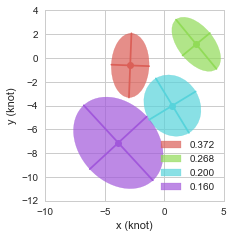

In [57]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [58]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuQLHd1JvhlvZ/9fr+76kqMAAt0BZJlBJ5RoIDQGCPD
rvEjYs2O7B17bQRG65CEJCCAa0DAtcOWVzYCww5iRtIQy2ANhL08hDSBFwn5ItZIQnC7+3Z3dXW9
u97vzNw/Wifvr7IyqzKzsqqrWvlFKK7u7crMX1VnfnV+53znO5woiiIsWLBg4ZTCdtILsGDBgoV+
wiI5CxYsnGpYJGfBgoVTDYvkLFiwcKphkZwFCxZONSySs2DBwqmGRXIWLFg41bBIzoIFC6caFslZ
sGDhVMMiOQsWLJxqWCRnwYKFUw2L5CxYsHCqYZGcBQsWTjUskrNgwcKphkVyFixYONWwSM6CBQun
GhbJWbBg4VTDIjkLFiycalgkZ8GChVMNi+QsWLBwqmGRnAULFk41LJKzYMHCqYZFchYsWDjVsEjO
ggULpxoWyVmwYOFUw3HSC7Bw8hBFEfV6Hc1mE3a7HU6nEzabDRzHnfTSLFjoGZwoiuJJL8LCyaFW
qyGXyyEYDKLRaAAAotEoJicnEQwGYbPZLNKzMNKwIrlXMHieR6VSQTKZhN/vR7PZhNPphCiKEEUR
PM+j2WyiXq+D4zjY7XaL9CyMHCySewVCFEU0m03wPA+O48DzPLa2tsDzPBwOBwRBQLlchtvthsNx
+RYh0qvVarDZbLDb7bDb7XA4HBbpWRhaWNvVVxgEQUCj0QD92g8PD5HJZLC2tgaXy4V6vY5YLAaO
49BoNOBwOODz+eD1euHz+WC321vOR+fhOE4iO4fD0fY6CxZOClYk9woBbT95ngcANJtNRCIRCIIA
p9OJYDCIer0Oj8cDp9OJ8fFx+P1+1Go1lMtl5HI5xONxifSI+FgyazabEEURtVrNIj0LQwOL5F4B
EAQBzWYTgiCA4zgUCgUcHBxgamoKY2Nj2Nvba3k9x3EQRREcx8Hj8cDj8WBqagqiKKJaraJSqSCb
zSIWi8HpdEqE14n0bLZjtVKj0cDY2JhFehYGBovkTjkoj0bFhFgshnw+j9XVVSlS05qx4DhOIjOW
9MrlMrLZLA4PD+FyuVq2t0RuoiiiUqkgkUhIBQz604r0LPQTFsmdUsi3p/V6Hfv7+3C5XAiHw1JB
oZdiAUt6wHHESJHe0dERDg8P4Xa7JcKjYyhSlEd6FulZ6AcskjuFkG9Pj46OEIvFMDc3h6mpqTZi
k0dyREJ6YbPZpHzd9PS0RHrlchmZTAbVahUAkEqlJHJkIz2L9Cz0AxbJnTKw21NBEHB4eIhKpYLN
zU14PJ621/dT9sGSHgCUSiUkEgkAQDqdRq1Wg8fjkSI9j8djkZ4F02GR3CmBKIqIx+Pw+Xxwu92o
VqvY39+H3+9HOByWyEPtWKC/hAcck57NZsPMzAyA44izUqmgXC4jlUpJpEc5Pa2k53K5LI2eBVVY
JHcKQNq3o6MjOBwOFAoFJJNJLC0tYXx8vOOxSuRgdLvaDfJr2Ww2+P1++P1+AJc7MKgLo16vS9ta
ivToHHLSq9fr4Hkek5OTcDqdFulZkGCR3IiDOhcItB0Mh8NwuVyazjEsenC73Y5AIIBAIADgMumV
y2UkEgk0Go22SI/IjAoeXq8X1Wq1pSPDIr1XNiySG1HIW7OKxSIqlQqCwSBWV1c1P9RqrxsG4utE
evF4HM1mUyI9Inp5pNdoNCzSe4XDIrkRBFtcAIB4PI6joyN4PB5MTEz0/AAPKwHISa/ZbEqkVywW
JckMRXput9siPQsWyY0S5Nq3RqOBSCQCjuMQDocRjUZ1n7Nf+bdBwOFwIBgMIhgMwu12o1KpIBAI
SOJknuelfJ7P52spULCkR4UMIj6L9E4XLJIbEci1b/l8HgcHB5iZmcHMzEyLyNYMjCLx2Ww2ifSA
40ivXC5LbWhslCcnPUEQpAIOS3oOhwMOh8MivRGGRXIjAJ7nJUNLURRxeHiIQqGA9fV1SYMGGIvK
2D5V9t9GDUrv2+FwYGxsDGNjYwCOI1/a3mazWQiC0BLpsREcS3qNRgOFQgHz8/MW6Y0gLJIbYsiL
C6R983g8OHPmjCWIlaEb8TidTjidzhbSo0gvk8lAFMWWSI9IjyJC2t5yHGdFeiMEi+SGFOz2FAAy
mQzi8Tjm5+cxOTlpmr6NzpPP55HL5eD1eqVm/tMOspQaHx+HKIotkV4mkwEAeL1eyUiUjXjZSM8i
veGGRXJDiKOjI9jtdrjdbgiCgGg0imq1qtqaRTBCckSih4eHGB8fR7FYRKlUgs1mQ6PRkLZypz1q
5DgOLpcLLperhfTK5TIKhQJqtRp2dnYUIz3AIr1hhkVyQwTanqZSKYyNjYHneezv7yMYDHZtzTIC
ciYBgFAoJBEkCYqdTify+Tzi8TicTqf0cMt944YBZkeeLOk5nU5kMhnMz8+jXC6jVCohlUrBZrO1
fCZqpAegZT6G3W63SG+AsEhuSMBq36h6WiqVNLVmEfREclSdnZ2dRaVSgd1uR7PZBABpXsPk5CQm
JydbfONYCyWK8tge05NEv4hDFEWpR9blcmFiYkIa40gaPfLJYwsZbARnkd7JwSK5E4Zc+8bzvLRd
1NOaBWgjOUEQEI/Hkc/npepsIpHoeBzrGye3UJI31st7TE8rOI6D2+2G2+2WvgiI9AqFgkR6rFW8
Guklk0lMTEzA7/dLDiun/fMbJCySO0Go2ZI7HA5MTEzoIjgtoO2pw+HoqTort1Ci6V7k/Mv2mJIr
yig/tHKJjRKUSK9Wq6FSqUhbfofD0bK9JdKrVqtS5bZerwNA23yMUf78ThoWyZ0Q5K1ZsVgM2WwW
KysryOfzhm7qTpFcLpdDNBrF7Owspqen23Rx9CCzf2qFzWZr6zEtl8sol8uIxWJoNptSol5epRwF
GMn3sfMxWNJTGgrEVtHpc6HoXj7z1iI9/bBIbsCQa98ajUZLdEVWSUYfLPlxgiAgFospiof7Bbvd
rth5UCgU0Gg0sL29LUV5RH69ot/EaUY/sNpQIJ7npfkY8uKORXq9wyK5AUK+PVWLrnppz2KPq9Vq
0lyHbtvTfuriqPPA7Xaj0WhgeXlZivRSqRQ4jmshPXag9TCgHwTK5jnz+TwWFhYgiqLqUCCL9Ixj
uO6mUwzW900URUSjUZRKJWxsbEiDYAhGSY49jghUba6D/Dj532n71A/IRbjyKiWbu3olaPTY6q3W
oUA0H8Mive6wSK7PUGvN8nq9CIfDig9wLyTH8zyi0SgKhYIigXZa50k8CGoJezZ3RbNd2Ydbaf39
Qr8/G6XzaxkKRDIedigQS3rNZhP1eh3RaBTLy8twOp2vSNKzSK6PYBvrgePhLYlEAgsLC5icnFQ9
zmgkxfM8stks/H6/rurpMN3warkrpYdbrtEbpvehB1pIVKmiTZ9Lt6FAlPejqJmN9JxOZws5nkZY
JNcHkPbt+eefx5kzZwAA0WgU9XodoVAIbre74/FGIrlcLod0Og2fz6fLGZhdsxk5QbOhpNGjORCk
0aN+W6fT2Zeo6yQiuW5QIj2loUBer7etcgu0RnqnnfQskjMZ8sb6UqmEWCyGsbExrKysaOoM0EMy
VD0tFosSCei9QUfphlYbfpNOp1EqlbC1taVqlHmaIf9cWNIDgO3t7Y6CbSXSs9vtkl5vlD9Di+RM
hFz7Rs31y8vLkr2PVmghObZ6Gg6HkcvlUKlUDK1dfr1hieS6gSzRq9UqOI7D+Ph4i2ccGWUqecZp
xTBGct1ApOf1epHNZhEKhaQIOJFIdJyEBly+l+VW8aNIehbJmQDanjabTcl/LBKJQBRFrK2tSSJZ
rdASyZHMoJP

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQFFf697/jwIjCKF4QCAIqGhV/JIquZFdjIlmWSkq3
tFARldqotZaul7hxFTQKGhFivOwfXrIbslnjbUUxFbUqtbtZNbrqagJ5QWQUFVfkJrAqyaAiMNPv
H2O3PT19m6Fneno4n6opmO4+fU7DfOc55znPeY6OoigKBAJBM3RTuwEEAsE5iGgJBI1BREsgaAwi
WgJBYxDREggag4iWQNAYfmo3wBWKi4vVbgLByxk7dqzkNSUlp2GxBPOeMxgMiIuLU7pZiqBJ0QJA
waazvMfNZjOMRqOHW6MuXfGZAeHnTs2eLKu8xRKMyKhc3nPV99Z1qm3uhHSPCQSNoYpoS0tLkZ6e
DgCoqqpCWloa5syZg+zsbFitVjWaRCBoBo+LNj8/H+vXr8ezZ88AAHl5eVi5ciUOHz4MiqJw+vRp
TzeJQNAUHhdtVFQUdu3axbwvLy/H+PHjAQCTJk3CpUuXPN0kAkFTeNwRlZycjJqaGuY9RVHQ6XQA
gMDAQJjNZln3EbtO7j18ia74zEDXfG7Vvcfdur0w9o8fP0avXr1klRPylnZFT2pXfGag6z636t7j
2NhYXLlyBQBw/vx5jBs3TuUWEQjejeqizcjIwK5du5Camor29nYkJyer3SQCQRSr1YqsrCykpqYi
PT0dVVVVdufPnDmDlJQUpKam4ujRo3bn2DMnAGAymfD6668jPT0d6enp+PrrryXrV6V7PHDgQOZh
Bg8ejIMHD6rRDALBJf71r3+hra0NBQUFKCkpwUcffYRPPvkEANDe3o68vDwUFhaiR48eSEtLQ2Ji
Ivr374/8/HycPHkSPXr0YO5VXl6O+fPnY8GCBbLrV93SEghao7i4GK+//joAYPTo0bh27RpzrrKy
ElFRUejduzcMBgPGjh2L77//HoDjzAkAXLt2Dd9++y3mzp2LdevWoaWlRbJ+IlpCl+ZR203elxgt
LS0ICgpi3uv1enR0dDDn2M6xwMBARojJycnw87Pv3L7yyitYs2YNDh06hMjISOzZs0eyzap7jwkE
NanGRN7jfUTKBAUF4fHjx8x7q9XKiJF77vHjx6Ie7qSkJGbGJCkpCZs3b5ZsM7G0BIKTxMfH4/z5
8wCAkpISvPzyy8y5mJgYVFVVobm5GW1tbSgqKsKYMWME77Vw4UJcvXoVAPCf//wHo0aNkqyfWFoC
wUmSkpJw8eJFzJ49GxRFITc3F6dOncKTJ0+QmpqKzMxMLFy4EBRFISUlBaGhoYL32rhxIzZv3gx/
f3/0799flqUloiUQnKRbt2748MMP7Y7FxMQwvycmJiIxMZG3LHvmBABGjRqFI0eOOFe/U1cTCATV
IaIlEDQGES2BoDGIaAkEjUFESyBoDCJaAkFjENESCBqDzNMSujQ1T6p4j4uFMaoNES2hS/OImqB2
E5yGdI8JBI1BREsgaAwiWgJBYxDREggag4iWQNAYxHvshVQ2PJa+iIXFQqHxCX+ZmNBAJZpE8CKI
aL0EtlBj4iKdKms2t8BoDOI9V1lW7XCMCFnbENGqBNeaOitUuXDvW1lWzdRNxKtNvEa006dPZzLc
DRw4EHl5eSq3yH0wonGTUMWg6yTidR2r1YqNGzeioqICBoMBOTk5iI6OZs6fOXMGe/bsgZ+fH1JS
UjBr1izmXGlpKbZv344DBw4AAK5fv47NmzdDr9fDYDBg69at6N+/v2j9XiHaZ8+egaIo5kF8GWcF
a3r4o+Q1FosF+vYX18X27S1ZhiteIlz5KJmsfMuWLdiwYQNGjhyJI0eOID8/H2vXrhWt3ytEe+PG
DTx9+hQLFixAR0cH3n//fYwePVrtZimKXLHyiTRmRLhoGfZGVJU36nnvISTkmLjILm11b5nreI9P
EikjN1k5ACZZ+dtvv80kK1+zZg1z/c6dOzFgwAAAti/f7t27S7bZK0QbEBCAhQsXYubMmbh79y5+
+9vf4u9//7tDYmc2Wtnqst5MMb+Hx/SH2eyYQf5ua5vd+/Aoe4HJeR76mgERjg6p+ns/oqzpIfN+
UIDB7vyAQbbw+PrK/+Fm3U8IN+ok6/MWOvu/1iPO6TJCycr9/Pwkk5Wzt3kFwAj2hx9+wMGDB3Ho
0CHJ+r1CtIMHD0Z0dDR0Oh0GDx6M4OBgNDU1ITxc2MJoYavLyobH0OuFrSttEfV6vaQ1FUPqmY2j
7M9V3qgH4Gh9jaODUFlWjcYn2rC4av2vlUxWDgBff/01PvnkE3z66afo27evZP1eIdrCwkLcvHkT
GzduRENDA1paWhASEqJ2szqFWHeY3X0VE2tZ8wNZdXVYLPBrbuM9Fxfcz+EYXaeJR7zs7rIWhKsG
8fHxOHv2LN555x3RZOU9e/ZEUVERFi5cKHivEydOoKCgAAcOHEBwcLCs+r1CtDNmzMDatWuRlpYG
nU6H3Nxc0a6xtyNHsEJi5Qp16JABkvWJWZyyO41279kijhkRzoyBiXDlo1SycovFgi1btiA8PBzL
ly8HAPzsZz/DihUrROvXURRFiV7hhRQXF6Ng01nec2p3j10VLC1WOSLlIveZb4sImK/LTAdmeKtw
hZ47NXsyxo4dK1m+uLgY+/A977l38TNZ91AD7ZozL0RIsEJiZVtVKbGWmZsEz3VYOjAG0qJl13H7
TiPKmh8wwuWzusTieidEtArhqmCdEevwSP5xvtlsRlmzsKjjjI7lhg4ZwAgXsFldIlxtQESrIEoK
Vo5Y2QhdU1HdZHcvtoDp+tlWlwjX+yGiVQC+VTlighUSq7NClQP3PmXVjgJmW10iXO+HiLaTiDme
2IIVs67uEKsQ9P3ZFjjOGMK0q+xOo6hwAZuDighXPcgi+E4gNY6lERJsmfmFcIZHhrhdsGzY9bG/
NIYOGcC0l5nP5TxPTFyk02t+CcpBRNtJpMaxfIKlxUoLx5Ni5ULXz/4CIcL1bohoXUTOOFZIsID7
u8HOwrW6XUW4pkcNvC9vRpZozWYzysvLcf36da8KxlcLueNYQBuCpXFFuIDz6XG8iVBdDO/LmxF1
RJ07dw6fffYZbt++jbCwMPj5+aG+vh4xMTFYsGAB3njjDU+10+uQO45l3rtJsBXVTeiwdMCvuVWR
ew+PDGGcVLSDiuucYkO8yp5HULSZmZno378/srKyMGzYMLtzt27dQmFhIU6dOoXt27e7vZHehJhV
EeoW8wm2tNXWBXs1gD8uVYoK1tTNUH0QjEaj3XQOtz4p6PYAwKuRoYLCBSAYq0zwDIKi/f3vfy8Y
6Dxs2DCsXbsW9+/fd1vDvBkpKwvIEyz7d2fESwuWnmelhyzswIkycxMqqpt4hcuun2ZkuK291+sb
Udra4CBcwPZlFCewyAAAsbYeQnBMSwt28+bNDucyMjIAAGFhYW5qlndS2fBYtrcYEBfsyPABzIs+
zicmNhXVNiHGGUN4QxPZ0OcrqvnDG9n1022gj9PtYY9xmS+h5ge841s18l11VQQt7QcffIDq6mpc
u3YNt27dYo53dHR0SWeUnG4xDdv5JCRYNg5Wjsfqcq2rHOKMIaILDYQYGT6A3+KyI6dExrfE2roX
QdEuWbIEtbW12LJlC5YtW8Yc1+v1iInxbu+au+CzstyoJ263mEZIsGzsxMIjXGcE6wqm9lrE+kc4
toVHuEwZnm4ywb0Ido8HDhyIhIQEnDx5EsHBwbh58yZMJhN69uwpe4W9r8DXLZYDbWX5BGtqr4Wp
vdahjJioPQG7XXxdZRqhbjKg7SkgLSA5T3vixAn87ne/Q01NDerq6rB06VIUFhZ6om1eDZ+VZX5n
WdnS1ga7cSM

## Goodness-of-fit Statistics

In [59]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.966  0.023      0.337  2.789981e-07      0.035       0.287

In [60]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [61]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [62]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.720866064854633
     jac: array([  3.26433015e+00,  -4.76837158e-07,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,  -2.38418579e-07,
         3.26433468e+00,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,  -2.38418579e-07,  -2.38418579e-07,
         3.26433372e+00,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00,  -2.38418579e-07,  -9.53674316e-07,
         3.26433229e+00,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -7.15255737e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2015
     nit: 76
    njev: 76
  status: 0
 success: True
       x: array([ 0.13583551,  3.4267089 ,  0.59128143,  1.43732597,  1.97945964,
       -0.42032425,  0.10217704, -1.22998212,  3.43401451,  2.22652793,
        1.33863912,  0.2789763 ,  0.60659526, -1.07605672, -3.10857389,
        3.80304381,  3.71439997,  0.16522894,  0.15539219, -2.83615347,
       -0.8398693 ,  1.3772814

## 6.1 GMM Result

In [63]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.607  -1.076  -3.109  3.803  3.714   0.165
2  0.155  -2.836  -0.840  1.377  1.800  -0.329
3  0.136   3.427   0.591  1.437  1.979  -0.420
4  0.102  -1.230   3.434  2.227  1.339   0.279

GMM Plot Result
0.60659526474 [[-1.07605672 -3.10857389]] [ 3.43107341  4.06049807] -49.0621033521
0.155392187891 [[-2.83615347 -0.8398693 ]] [ 1.22941385  1.90403569] -154.721916556
0.135835506489 [[ 3.4267089   0.59128143]] [ 1.21634465  2.12242128] -153.878453896
0.102177040879 [[-1.22998212  3.43401451]] [ 1.25969561  2.27212418] -76.1423567879


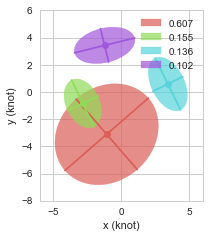

In [64]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [65]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.017      0.017  5.472933e-08      0.015       0.127

In [66]:
# Empirical Power
pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)    0.055724  0.023831  1.390425e-07    0.025830     0.203014   
(1997, 2002)    0.038768  0.015876  9.186261e-08    0.020559     0.164481   
(1991, 1996)    0.301746  0.026755  1.203470e-07    0.022697     0.186056   

              R_square  
year_lim                
(2001, 2006)  0.983403  
(1997, 2002)  0.988895  
(1991, 1996)  0.985451

In [67]:
%%time
# GMM test against previous data
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar_previous = []
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
for year_length in [10]:
    color = next(prop_cycle)
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
       for sub_start_year in arange(start_year, end_year+1)) 
    gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
    
    gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
    gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
    gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous'
    gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set_bivar_previous.append(gofs_mean)
    
print('10 year comparison')
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

SyntaxError: invalid syntax (<unknown>, line 16)

In [ ]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

## 6.3 Univariate Goodness-of-fit

In [ ]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [ ]:
%%time
x = arange(0, max_speed, 0.5)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [ ]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

In [ ]:
%%time
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, y[:-1]))

In [ ]:
pd.DataFrame(gofs_mean_set).set_index('year_lim')

In [ ]:
fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
gofs_mean_set = []

x = bins = arange(0, df['speed'].max() + 1)
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x)
_, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x, weibull_params)
    
for year_length in [10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs = []
    for sub_start_year in arange(start_year, end_year+1):
        df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
        
        _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

        r_square_speed = sector_r_square(density_speed, density_speed_expected_gmm)
        r_square_speed_weibull = sector_r_square(density_speed, density_expected_weibull)

        k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
        k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()
        
        r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
        gofs.append({'year': sub_start_year, 
                     'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                      'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

    gofs=pd.DataFrame(gofs).set_index(['year'])  
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set.append(gofs_mean)

    color = next(prop_cycle)
    # GMM agains previous data
    gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
    gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
    gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
    # Empricial agains previous data
    ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
    ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
    ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
    color = next(prop_cycle)
    gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
    gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)
    
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

In [ ]:
for rad in  linspace(0,2*pi, num=20):
    x = arange(0, max_speed, 0.5)
    y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
    plot(x, y, label=rad)
plt_configure(legend=True)

In [ ]:
x = arange(0, max_speed, 0.5)
y_ =[]
for x_ in x:
    def sub_f(theta, V=x_):
        return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
    y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
y = array(list(zip(*y_))[0])
plot(x, y)

In [ ]:
for integrate_interval in [[0, inf], [10, 25], [0,10]]:
    rads = linspace(0,2*pi, num=40)
    y_ =[]
    for rad in rads:
        def sub_f(V,theta=rad):
            return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
        y_.append(integrate.nquad(sub_f, [integrate_interval]))
    y = array(list(zip(*y_))[0])
    plot(rads, y)

## 6.4 Sectoral Comaprison

In [ ]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

In [ ]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [ ]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [ ]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [ ]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [ ]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### (2) Time Variability

In [ ]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

### (3) Adjacent Sector Variability

In [ ]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [ ]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

## 7.1 Variability of the Result

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(12))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)